In [1]:
#Import Data Manupulation Library
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

#Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Import Filter Warnings Library
import warnings
warnings.filterwarnings("ignore")

#Import Logging Library
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(levelname)s - %(message)s - %(asctime)s',force=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE


# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [2]:
#Import Data Using Pandas Function
# Load the Dataset

url = "https://raw.githubusercontent.com/ankitmandhare1111/Wine-quality-project-ML/refs/heads/main/winequality-red.csv"
df=pd.read_csv(url)
df.sample(frac=1)


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
332,8;0.58;0.28;3.2;0.066;21;114;0.9973;3.22;0.54;...
764,9.1;0.68;0.11;2.8;0.093;11;44;0.99888;3.31;0.5...
511,10;0.59;0.31;2.2;0.09;26;62;0.9994;3.18;0.63;1...
301,11.1;0.18;0.48;1.5;0.068;7;15;0.9973;3.22;0.64...
1118,7.1;0.39;0.12;2.1;0.065;14;24;0.99252;3.3;0.53...
...,...
1081,7.9;0.3;0.68;8.3;0.05;37.5;289;0.99316;3.01;0....
1083,8.7;0.42;0.45;2.4;0.072;32;59;0.99617;3.33;0.7...
1051,8.5;0.46;0.59;1.4;0.414;16;45;0.99702;3.03;1.3...
294,13.3;0.34;0.52;3.2;0.094;17;53;1.0014;3.05;0.8...


In [3]:
# statistical info
df.describe()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,1599
unique,1359
top,7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85...
freq,4


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [5]:
# check for null values
df.isnull().sum()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64

In [6]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

TypeError: Could not convert string '7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;57.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;57.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;511.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;67.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;57.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;57.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;57.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;77.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;77.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;56.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;57.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;55.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;57.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;58.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;58.9;0.62;0.19;3.9;0.17;51;148;0.9986;3.17;0.93;9.2;58.5;0.28;0.56;1.8;0.092;35;103;0.9969;3.3;0.75;10.5;78.1;0.56;0.28;1.7;0.368;16;56;0.9968;3.11;1.28;9.3;57.4;0.59;0.08;4.4;0.086;6;29;0.9974;3.38;0.5;9;47.9;0.32;0.51;1.8;0.341;17;56;0.9969;3.04;1.08;9.2;68.9;0.22;0.48;1.8;0.077;29;60;0.9968;3.39;0.53;9.4;67.6;0.39;0.31;2.3;0.082;23;71;0.9982;3.52;0.65;9.7;57.9;0.43;0.21;1.6;0.106;10;37;0.9966;3.17;0.91;9.5;58.5;0.49;0.11;2.3;0.084;9;67;0.9968;3.17;0.53;9.4;56.9;0.4;0.14;2.4;0.085;21;40;0.9968;3.43;0.63;9.7;66.3;0.39;0.16;1.4;0.08;11;23;0.9955;3.34;0.56;9.3;57.6;0.41;0.24;1.8;0.08;4;11;0.9962;3.28;0.59;9.5;57.9;0.43;0.21;1.6;0.106;10;37;0.9966;3.17;0.91;9.5;57.1;0.71;0;1.9;0.08;14;35;0.9972;3.47;0.55;9.4;57.8;0.645;0;2;0.082;8;16;0.9964;3.38;0.59;9.8;66.7;0.675;0.07;2.4;0.089;17;82;0.9958;3.35;0.54;10.1;56.9;0.685;0;2.5;0.105;22;37;0.9966;3.46;0.57;10.6;68.3;0.655;0.12;2.3;0.083;15;113;0.9966;3.17;0.66;9.8;56.9;0.605;0.12;10.7;0.073;40;83;0.9993;3.45;0.52;9.4;65.2;0.32;0.25;1.8;0.103;13;50;0.9957;3.38;0.55;9.2;57.8;0.645;0;5.5;0.086;5;18;0.9986;3.4;0.55;9.6;67.8;0.6;0.14;2.4;0.086;3;15;0.9975;3.42;0.6;10.8;68.1;0.38;0.28;2.1;0.066;13;30;0.9968;3.23;0.73;9.7;75.7;1.13;0.09;1.5;0.172;7;19;0.994;3.5;0.48;9.8;47.3;0.45;0.36;5.9;0.074;12;87;0.9978;3.33;0.83;10.5;57.3;0.45;0.36;5.9;0.074;12;87;0.9978;3.33;0.83;10.5;58.8;0.61;0.3;2.8;0.088;17;46;0.9976;3.26;0.51;9.3;47.5;0.49;0.2;2.6;0.332;8;14;0.9968;3.21;0.9;10.5;68.1;0.66;0.22;2.2;0.069;9;23;0.9968;3.3;1.2;10.3;56.8;0.67;0.02;1.8;0.05;5;11;0.9962;3.48;0.52;9.5;54.6;0.52;0.15;2.1;0.054;8;65;0.9934;3.9;0.56;13.1;47.7;0.935;0.43;2.2;0.114;22;114;0.997;3.25;0.73;9.2;58.7;0.29;0.52;1.6;0.113;12;37;0.9969;3.25;0.58;9.5;56.4;0.4;0.23;1.6;0.066;5;12;0.9958;3.34;0.56;9.2;55.6;0.31;0.37;1.4;0.074;12;96;0.9954;3.32;0.58;9.2;58.8;0.66;0.26;1.7;0.074;4;23;0.9971;3.15;0.74;9.2;56.6;0.52;0.04;2.2;0.069;8;15;0.9956;3.4;0.63;9.4;66.6;0.5;0.04;2.1;0.068;6;14;0.9955;3.39;0.64;9.4;68.6;0.38;0.36;3;0.081;30;119;0.997;3.2;0.56;9.4;57.6;0.51;0.15;2.8;0.11;33;73;0.9955;3.17;0.63;10.2;67.7;0.62;0.04;3.8;0.084;25;45;0.9978;3.34;0.53;9.5;510.2;0.42;0.57;3.4;0.07;4;10;0.9971;3.04;0.63;9.6;57.5;0.63;0.12;5.1;0.111;50;110;0.9983;3.26;0.77;9.4;57.8;0.59;0.18;2.3;0.076;17;54;0.9975;3.43;0.59;10;57.3;0.39;0.31;2.4;0.074;9;46;0.9962;3.41;0.54;9.4;68.8;0.4;0.4;2.2;0.079;19;52;0.998;3.44;0.64;9.2;57.7;0.69;0.49;1.8;0.115;20;112;0.9968;3.21;0.71;9.3;57.5;0.52;0.16;1.9;0.085;12;35;0.9968;3.38;0.62;9.5;77;0.735;0.05;2;0.081;13;54;0.9966;3.39;0.57;9.8;57.2;0.725;0.05;4.65;0.086;4;11;0.9962;3.41;0.39;10.9;57.2;0.725;0.05;4.65;0.086;4;11;0.9962;3.41;0.39;10.9;57.5;0.52;0.11;1.5;0.079;11;39;0.9968;3.42;0.58;9.6;56.6;0.705;0.07;1.6;0.076;6;15;0.9962;3.44;0.58;10.7;59.3;0.32;0.57;2;0.074;27;65;0.9969;3.28;0.79;10.7;58;0.705;0.05;1.9;0.074;8;19;0.9962;3.34;0.95;10.5;67.7;0.63;0.08;1.9;0.076;15;27;0.9967;3.32;0.54;9.5;67.7;0.67;0.23;2.1;0.088;17;96;0.9962;3.32;0.48;9.5;57.7;0.69;0.22;1.9;0.084;18;94;0.9961;3.31;0.48;9.5;58.3;0.675;0.26;2.1;0.084;11;43;0.9976;3.31;0.53;9.2;49.7;0.32;0.54;2.5;0.094;28;83;0.9984;3.28;0.82;9.6;58.8;0.41;0.64;2.2;0.093;9;42;0.9986;3.54;0.66;10.5;58.8;0.41;0.64;2.2;0.093;9;42;0.9986;3.54;0.66;10.5;56.8;0.785;0;2.4;0.104;14;30;0.9966;3.52;0.55;10.7;66.7;0.75;0.12;2;0.086;12;80;0.9958;3.38;0.52;10.1;58.3;0.625;0.2;1.5;0.08;27;119;0.9972;3.16;1.12;9.1;46.2;0.45;0.2;1.6;0.069;3;15;0.9958;3.41;0.56;9.2;57.8;0.43;0.7;1.9;0.464;22;67;0.9974;3.13;1.28;9.4;57.4;0.5;0.47;2;0.086;21;73;0.997;3.36;0.57;9.1;57.3;0.67;0.26;1.8;0.401;16;51;0.9969;3.16;1.14;9.4;56.3;0.3;0.48;1.8;0.069;18;61;0.9959;3.44;0.78;10.3;66.9;0.55;0.15;2.2;0.076;19;40;0.9961;3.41;0.59;10.1;58.6;0.49;0.28;1.9;0.11;20;136;0.9972;2.93;1.95;9.9;67.7;0.49;0.26;1.9;0.062;9;31;0.9966;3.39;0.64;9.6;59.3;0.39;0.44;2.1;0.107;34;125;0.9978;3.14;1.22;9.5;57;0.62;0.08;1.8;0.076;8;24;0.9978;3.48;0.53;9;57.9;0.52;0.26;1.9;0.079;42;140;0.9964;3.23;0.54;9.5;58.6;0.49;0.28;1.9;0.11;20;136;0.9972;2.93;1.95;9.9;68.6;0.49;0.29;2;0.11;19;133;0.9972;2.93;1.98;9.8;57.7;0.49;0.26;1.9;0.062;9;31;0.9966;3.39;0.64;9.6;55;1.02;0.04;1.4;0.045;41;85;0.9938;3.75;0.48;10.5;44.7;0.6;0.17;2.3;0.058;17;106;0.9932;3.85;0.6;12.9;66.8;0.775;0;3;0.102;8;23;0.9965;3.45;0.56;10.7;57;0.5;0.25;2;0.07;3;22;0.9963;3.25;0.63;9.2;57.6;0.9;0.06;2.5;0.079;5;10;0.9967;3.39;0.56;9.8;58.1;0.545;0.18;1.9;0.08;13;35;0.9972;3.3;0.59;9;68.3;0.61;0.3;2.1;0.084;11;50;0.9972;3.4;0.61;10.2;67.8;0.5;0.3;1.9;0.075;8;22;0.9959;3.31;0.56;10.4;68.1;0.545;0.18;1.9;0.08;13;35;0.9972;3.3;0.59;9;68.1;0.575;0.22;2.1;0.077;12;65;0.9967;3.29;0.51;9.2;57.2;0.49;0.24;2.2;0.07;5;36;0.996;3.33;0.48;9.4;58.1;0.575;0.22;2.1;0.077;12;65;0.9967;3.29;0.51;9.2;57.8;0.41;0.68;1.7;0.467;18;69;0.9973;3.08;1.31;9.3;56.2;0.63;0.31;1.7;0.088;15;64;0.9969;3.46;0.79;9.3;58;0.33;0.53;2.5;0.091;18;80;0.9976;3.37;0.8;9.6;68.1;0.785;0.52;2;0.122;37;153;0.9969;3.21;0.69;9.3;57.8;0.56;0.19;1.8;0.104;12;47;0.9964;3.19;0.93;9.5;58.4;0.62;0.09;2.2;0.084;11;108;0.9964;3.15;0.66;9.8;58.4;0.6;0.1;2.2;0.085;14;111;0.9964;3.15;0.66;9.8;510.1;0.31;0.44;2.3;0.08;22;46;0.9988;3.32;0.67;9.7;67.8;0.56;0.19;1.8;0.104;12;47;0.9964;3.19;0.93;9.5;59.4;0.4;0.31;2.2;0.09;13;62;0.9966;3.07;0.63;10.5;68.3;0.54;0.28;1.9;0.077;11;40;0.9978;3.39;0.61;10;67.8;0.56;0.12;2;0.082;7;28;0.997;3.37;0.5;9.4;68.8;0.55;0.04;2.2;0.119;14;56;0.9962;3.21;0.6;10.9;67;0.69;0.08;1.8;0.097;22;89;0.9959;3.34;0.54;9.2;67.3;1.07;0.09;1.7;0.178;10;89;0.9962;3.3;0.57;9;58.8;0.55;0.04;2.2;0.119;14;56;0.9962;3.21;0.6;10.9;67.3;0.695;0;2.5;0.075;3;13;0.998;3.49;0.52;9.2;58;0.71;0;2.6;0.08;11;34;0.9976;3.44;0.53;9.5;57.8;0.5;0.17;1.6;0.082;21;102;0.996;3.39;0.48;9.5;59;0.62;0.04;1.9;0.146;27;90;0.9984;3.16;0.7;9.4;58.2;1.33;0;1.7;0.081;3;12;0.9964;3.53;0.49;10.9;58.1;1.33;0;1.8;0.082;3;12;0.9964;3.54;0.48;10.9;58;0.59;0.16;1.8;0.065;3;16;0.9962;3.42;0.92;10.5;76.1;0.38;0.15;1.8;0.072;6;19;0.9955;3.42;0.57;9.4;58;0.745;0.56;2;0.118;30;134;0.9968;3.24;0.66;9.4;55.6;0.5;0.09;2.3;0.049;17;99;0.9937;3.63;0.63;13;55.6;0.5;0.09;2.3;0.049;17;99;0.9937;3.63;0.63;13;56.6;0.5;0.01;1.5;0.06;17;26;0.9952;3.4;0.58;9.8;67.9;1.04;0.05;2.2;0.084;13;29;0.9959;3.22;0.55;9.9;68.4;0.745;0.11;1.9;0.09;16;63;0.9965;3.19;0.82;9.6;58.3;0.715;0.15;1.8;0.089;10;52;0.9968;3.23;0.77;9.5;57.2;0.415;0.36;2;0.081;13;45;0.9972;3.48;0.64;9.2;57.8;0.56;0.19;2.1;0.081;15;105;0.9962;3.33;0.54;9.5;57.8;0.56;0.19;2;0.081;17;108;0.9962;3.32;0.54;9.5;58.4;0.745;0.11;1.9;0.09;16;63;0.9965;3.19;0.82;9.6;58.3;0.715;0.15;1.8;0.089;10;52;0.9968;3.23;0.77;9.5;55.2;0.34;0;1.8;0.05;27;63;0.9916;3.68;0.79;14;66.3;0.39;0.08;1.7;0.066;3;20;0.9954;3.34;0.58;9.4;55.2;0.34;0;1.8;0.05;27;63;0.9916;3.68;0.79;14;68.1;0.67;0.55;1.8;0.117;32;141;0.9968;3.17;0.62;9.4;55.8;0.68;0.02;1.8;0.087;21;94;0.9944;3.54;0.52;10;57.6;0.49;0.26;1.6;0.236;10;88;0.9968;3.11;0.8;9.3;56.9;0.49;0.1;2.3;0.074;12;30;0.9959;3.42;0.58;10.2;68.2;0.4;0.44;2.8;0.089;11;43;0.9975;3.53;0.61;10.5;67.3;0.33;0.47;2.1;0.077;5;11;0.9958;3.33;0.53;10.3;69.2;0.52;1;3.4;0.61;32;69;0.9996;2.74;2.0;9.4;47.5;0.6;0.03;1.8;0.095;25;99;0.995;3.35;0.54;10.1;57.5;0.6;0.03;1.8;0.095;25;99;0.995;3.35;0.54;10.1;57.1;0.43;0.42;5.5;0.07;29;129;0.9973;3.42;0.72;10.5;57.1;0.43;0.42;5.5;0.071;28;128;0.9973;3.42;0.71;10.5;57.1;0.43;0.42;5.5;0.07;29;129;0.9973;3.42;0.72;10.5;57.1;0.43;0.42;5.5;0.071;28;128;0.9973;3.42;0.71;10.5;57.1;0.68;0;2.2;0.073;12;22;0.9969;3.48;0.5;9.3;56.8;0.6;0.18;1.9;0.079;18;86;0.9968;3.59;0.57;9.3;67.6;0.95;0.03;2;0.09;7;20;0.9959;3.2;0.56;9.6;57.6;0.68;0.02;1.3;0.072;9;20;0.9965;3.17;1.08;9.2;47.8;0.53;0.04;1.7;0.076;17;31;0.9964;3.33;0.56;10;67.4;0.6;0.26;7.3;0.07;36;121;0.9982;3.37;0.49;9.4;57.3;0.59;0.26;7.2;0.07;35;121;0.9981;3.37;0.49;9.4;57.8;0.63;0.48;1.7;0.1;14;96;0.9961;3.19;0.62;9.5;56.8;0.64;0.1;2.1;0.085;18;101;0.9956;3.34;0.52;10.2;57.3;0.55;0.03;1.6;0.072;17;42;0.9956;3.37;0.48;9;46.8;0.63;0.07;2.1;0.089;11;44;0.9953;3.47;0.55;10.4;67.5;0.705;0.24;1.8;0.36;15;63;0.9964;3;1.59;9.5;57.9;0.885;0.03;1.8;0.058;4;8;0.9972;3.36;0.33;9.1;48;0.42;0.17;2;0.073;6;18;0.9972;3.29;0.61;9.2;68;0.42;0.17;2;0.073;6;18;0.9972;3.29;0.61;9.2;67.4;0.62;0.05;1.9;0.068;24;42;0.9961;3.42;0.57;11.5;67.3;0.38;0.21;2;0.08;7;35;0.9961;3.33;0.47;9.5;56.9;0.5;0.04;1.5;0.085;19;49;0.9958;3.35;0.78;9.5;57.3;0.38;0.21;2;0.08;7;35;0.9961;3.33;0.47;9.5;57.5;0.52;0.42;2.3;0.087;8;38;0.9972;3.58;0.61;10.5;67;0.805;0;2.5;0.068;7;20;0.9969;3.48;0.56;9.6;58.8;0.61;0.14;2.4;0.067;10;42;0.9969;3.19;0.59;9.5;58.8;0.61;0.14;2.4;0.067;10;42;0.9969;3.19;0.59;9.5;58.9;0.61;0.49;2;0.27;23;110;0.9972;3.12;1.02;9.3;57.2;0.73;0.02;2.5;0.076;16;42;0.9972;3.44;0.52;9.3;56.8;0.61;0.2;1.8;0.077;11;65;0.9971;3.54;0.58;9.3;56.7;0.62;0.21;1.9;0.079;8;62;0.997;3.52;0.58;9.3;68.9;0.31;0.57;2;0.111;26;85;0.9971;3.26;0.53;9.7;57.4;0.39;0.48;2;0.082;14;67;0.9972;3.34;0.55;9.2;57.7;0.705;0.1;2.6;0.084;9;26;0.9976;3.39;0.49;9.7;57.9;0.5;0.33;2;0.084;15;143;0.9968;3.2;0.55;9.5;57.9;0.49;0.32;1.9;0.082;17;144;0.9968;3.2;0.55;9.5;58.2;0.5;0.35;2.9;0.077;21;127;0.9976;3.23;0.62;9.4;56.4;0.37;0.25;1.9;0.074;21;49;0.9974;3.57;0.62;9.8;66.8;0.63;0.12;3.8;0.099;16;126;0.9969;3.28;0.61;9.5;57.6;0.55;0.21;2.2;0.071;7;28;0.9964;3.28;0.55;9.7;57.6;0.55;0.21;2.2;0.071;7;28;0.9964;3.28;0.55;9.7;57.8;0.59;0.33;2;0.074;24;120;0.9968;3.25;0.54;9.4;57.3;0.58;0.3;2.4;0.074;15;55;0.9968;3.46;0.59;10.2;511.5;0.3;0.6;2;0.067;12;27;0.9981;3.11;0.97;10.1;65.4;0.835;0.08;1.2;0.046;13;93;0.9924;3.57;0.85;13;76.9;1.09;0.06;2.1;0.061;12;31;0.9948;3.51;0.43;11.4;49.6;0.32;0.47;1.4;0.056;9;24;0.99695;3.22;0.82;10.3;78.8;0.37;0.48;2.1;0.097;39;145;0.9975;3.04;1.03;9.3;56.8;0.5;0.11;1.5;0.075;16;49;0.99545;3.36;0.79;9.5;57;0.42;0.35;1.6;0.088;16;39;0.9961;3.34;0.55;9.2;57;0.43;0.36;1.6;0.089;14;37;0.99615;3.34;0.56;9.2;612.8;0.3;0.74;2.6;0.095;9;28;0.9994;3.2;0.77;10.8;712.8;0.3;0.74;2.6;0.095;9;28;0.9994;3.2;0.77;10.8;77.8;0.57;0.31;1.8;0.069;26;120;0.99625;3.29;0.53;9.3;57.8;0.44;0.28;2.7;0.1;18;95;0.9966;3.22;0.67;9.4;511;0.3;0.58;2.1;0.054;7;19;0.998;3.31;0.88;10.5;79.7;0.53;0.6;2;0.039;5;19;0.99585;3.3;0.86;12.4;68;0.725;0.24;2.8;0.083;10;62;0.99685;3.35;0.56;10;611.6;0.44;0.64;2.1;0.059;5;15;0.998;3.21;0.67;10.2;68.2;0.57;0.26;2.2;0.06;28;65;0.9959;3.3;0.43;10.1;57.8;0.735;0.08;2.4;0.092;10;41;0.9974;3.24;0.71;9.8;67;0.49;0.49;5.6;0.06;26;121;0.9974;3.34;0.76;10.5;58.7;0.625;0.16;2;0.101;13;49;0.9962;3.14;0.57;11;58.1;0.725;0.22;2.2;0.072;11;41;0.9967;3.36;0.55;9.1;57.5;0.49;0.19;1.9;0.076;10;44;0.9957;3.39;0.54;9.7;57.8;0.53;0.33;2.4;0.08;24;144;0.99655;3.3;0.6;9.5;57.8;0.34;0.37;2;0.082;24;58;0.9964;3.34;0.59;9.4;67.4;0.53;0.26;2;0.101;16;72;0.9957;3.15;0.57;9.4;56.8;0.61;0.04;1.5;0.057;5;10;0.99525;3.42;0.6;9.5;58.6;0.645;0.25;2;0.083;8;28;0.99815;3.28;0.6;10;68.4;0.635;0.36;2;0.089;15;55;0.99745;3.31;0.57;10.4;47.7;0.43;0.25;2.6;0.073;29;63;0.99615;3.37;0.58;10.5;68.9;0.59;0.5;2;0.337;27;81;0.9964;3.04;1.61;9.5;69;0.82;0.14;2.6;0.089;9;23;0.9984;3.39;0.63;9.8;57.7;0.43;0.25;2.6;0.073;29;63;0.99615;3.37;0.58;10.5;66.9;0.52;0.25;2.6;0.081;10;37;0.99685;3.46;0.5;11;55.2;0.48;0.04;1.6;0.054;19;106;0.9927;3.54;0.62;12.2;78;0.38;0.06;1.8;0.078;12;49;0.99625;3.37;0.52;9.9;68.5;0.37;0.2;2.8;0.09;18;58;0.998;3.34;0.7;9.6;66.9;0.52;0.25;2.6;0.081;10;37;0.99685;3.46;0.5;11;58.2;1;0.09;2.3;0.065;7;37;0.99685;3.32;0.55;9;67.2;0.63;0;1.9;0.097;14;38;0.99675;3.37;0.58;9;67.2;0.63;0;1.9;0.097;14;38;0.99675;3.37;0.58;9;67.2;0.645;0;1.9;0.097;15;39;0.99675;3.37;0.58;9.2;67.2;0.63;0;1.9;0.097;14;38;0.99675;3.37;0.58;9;68.2;1;0.09;2.3;0.065;7;37;0.99685;3.32;0.55;9;68.9;0.635;0.37;1.7;0.263;5;62;0.9971;3;1.09;9.3;512;0.38;0.56;2.1;0.093;6;24;0.99925;3.14;0.71;10.9;67.7;0.58;0.1;1.8;0.102;28;109;0.99565;3.08;0.49;9.8;615;0.21;0.44;2.2;0.075;10;24;1.00005;3.07;0.84;9.2;715;0.21;0.44;2.2;0.075;10;24;1.00005;3.07;0.84;9.2;77.3;0.66;0;2;0.084;6;23;0.9983;3.61;0.96;9.9;67.1;0.68;0.07;1.9;0.075;16;51;0.99685;3.38;0.52;9.5;58.2;0.6;0.17;2.3;0.072;11;73;0.9963;3.2;0.45;9.3;57.7;0.53;0.06;1.7;0.074;9;39;0.99615;3.35;0.48;9.8;67.3;0.66;0;2;0.084;6;23;0.9983;3.61;0.96;9.9;610.8;0.32;0.44;1.6;0.063;16;37;0.9985;3.22;0.78;10;67.1;0.6;0;1.8;0.074;16;34;0.9972;3.47;0.7;9.9;611.1;0.35;0.48;3.1;0.09;5;21;0.9986;3.17;0.53;10.5;57.7;0.775;0.42;1.9;0.092;8;86;0.9959;3.23;0.59;9.5;57.1;0.6;0;1.8;0.074;16;34;0.9972;3.47;0.7;9.9;68;0.57;0.23;3.2;0.073;17;119;0.99675;3.26;0.57;9.3;59.4;0.34;0.37;2.2;0.075;5;13;0.998;3.22;0.62;9.2;56.6;0.695;0;2.1;0.075;12;56;0.9968;3.49;0.67;9.2;57.7;0.41;0.76;1.8;0.611;8;45;0.9968;3.06;1.26;9.4;510;0.31;0.47;2.6;0.085;14;33;0.99965;3.36;0.8;10.5;77.9;0.33;0.23;1.7;0.077;18;45;0.99625;3.29;0.65;9.3;57;0.975;0.04;2;0.087;12;67;0.99565;3.35;0.6;9.4;48;0.52;0.03;1.7;0.07;10;35;0.99575;3.34;0.57;10;57.9;0.37;0.23;1.8;0.077;23;49;0.9963;3.28;0.67;9.3;512.5;0.56;0.49;2.4;0.064;5;27;0.9999;3.08;0.87;10.9;511.8;0.26;0.52;1.8;0.071;6;10;0.9968;3.2;0.72;10.2;78.1;0.87;0;3.3;0.096;26;61;1.00025;3.6;0.72;9.8;47.9;0.35;0.46;3.6;0.078;15;37;0.9973;3.35;0.86;12.8;86.9;0.54;0.04;3;0.077;7;27;0.9987;3.69;0.91;9.4;611.5;0.18;0.51;4;0.104;4;23;0.9996;3.28;0.97;10.1;67.9;0.545;0.06;4;0.087;27;61;0.9965;3.36;0.67;10.7;611.5;0.18;0.51;4;0.104;4;23;0.9996;3.28;0.97;10.1;610.9;0.37;0.58;4;0.071;17;65;0.99935;3.22;0.78;10.1;58.4;0.715;0.2;2.4;0.076;10;38;0.99735;3.31;0.64;9.4;57.5;0.65;0.18;7;0.088;27;94;0.99915;3.38;0.77;9.4;57.9;0.545;0.06;4;0.087;27;61;0.9965;3.36;0.67;10.7;66.9;0.54;0.04;3;0.077;7;27;0.9987;3.69;0.91;9.4;611.5;0.18;0.51;4;0.104;4;23;0.9996;3.28;0.97;10.1;610.3;0.32;0.45;6.4;0.073;5;13;0.9976;3.23;0.82;12.6;88.9;0.4;0.32;5.6;0.087;10;47;0.9991;3.38;0.77;10.5;711.4;0.26;0.44;3.6;0.071;6;19;0.9986;3.12;0.82;9.3;67.7;0.27;0.68;3.5;0.358;5;10;0.9972;3.25;1.08;9.9;77.6;0.52;0.12;3;0.067;12;53;0.9971;3.36;0.57;9.1;58.9;0.4;0.32;5.6;0.087;10;47;0.9991;3.38;0.77;10.5;79.9;0.59;0.07;3.4;0.102;32;71;1.00015;3.31;0.71;9.8;59.9;0.59;0.07;3.4;0.102;32;71;1.00015;3.31;0.71;9.8;512;0.45;0.55;2;0.073;25;49;0.9997;3.1;0.76;10.3;67.5;0.4;0.12;3;0.092;29;53;0.9967;3.37;0.7;10.3;68.7;0.52;0.09;2.5;0.091;20;49;0.9976;3.34;0.86;10.6;711.6;0.42;0.53;3.3;0.105;33;98;1.001;3.2;0.95;9.2;58.7;0.52;0.09;2.5;0.091;20;49;0.9976;3.34;0.86;10.6;711;0.2;0.48;2;0.343;6;18;0.9979;3.3;0.71;10.5;510.4;0.55;0.23;2.7;0.091;18;48;0.9994;3.22;0.64;10.3;66.9;0.36;0.25;2.4;0.098;5;16;0.9964;3.41;0.6;10.1;613.3;0.34;0.52;3.2;0.094;17;53;1.0014;3.05;0.81;9.5;610.8;0.5;0.46;2.5;0.073;5;27;1.0001;3.05;0.64;9.5;510.6;0.83;0.37;2.6;0.086;26;70;0.9981;3.16;0.52;9.9;57.1;0.63;0.06;2;0.083;8;29;0.99855;3.67;0.73;9.6;57.2;0.65;0.02;2.3;0.094;5;31;0.9993;3.67;0.8;9.7;56.9;0.67;0.06;2.1;0.08;8;33;0.99845;3.68;0.71;9.6;57.5;0.53;0.06;2.6;0.086;20;44;0.9965;3.38;0.59;10.7;611.1;0.18;0.48;1.5;0.068;7;15;0.9973;3.22;0.64;10.1;68.3;0.705;0.12;2.6;0.092;12;28;0.9994;3.51;0.72;10;57.4;0.67;0.12;1.6;0.186;5;21;0.996;3.39;0.54;9.5;58.4;0.65;0.6;2.1;0.112;12;90;0.9973;3.2;0.52;9.2;510.3;0.53;0.48;2.5;0.063;6;25;0.9998;3.12;0.59;9.3;67.6;0.62;0.32;2.2;0.082;7;54;0.9966;3.36;0.52;9.4;510.3;0.41;0.42;2.4;0.213;6;14;0.9994;3.19;0.62;9.5;610.3;0.43;0.44;2.4;0.214;5;12;0.9994;3.19;0.63;9.5;67.4;0.29;0.38;1.7;0.062;9;30;0.9968;3.41;0.53;9.5;610.3;0.53;0.48;2.5;0.063;6;25;0.9998;3.12;0.59;9.3;67.9;0.53;0.24;2;0.072;15;105;0.996;3.27;0.54;9.4;69;0.46;0.31;2.8;0.093;19;98;0.99815;3.32;0.63;9.5;68.6;0.47;0.3;3;0.076;30;135;0.9976;3.3;0.53;9.4;57.4;0.36;0.29;2.6;0.087;26;72;0.99645;3.39;0.68;11;57.1;0.35;0.29;2.5;0.096;20;53;0.9962;3.42;0.65;11;69.6;0.56;0.23;3.4;0.102;37;92;0.9996;3.3;0.65;10.1;59.6;0.77;0.12;2.9;0.082;30;74;0.99865;3.3;0.64;10.4;69.8;0.66;0.39;3.2;0.083;21;59;0.9989;3.37;0.71;11.5;79.6;0.77;0.12;2.9;0.082;30;74;0.99865;3.3;0.64;10.4;69.8;0.66;0.39;3.2;0.083;21;59;0.9989;3.37;0.71;11.5;79.3;0.61;0.26;3.4;0.09;25;87;0.99975;3.24;0.62;9.7;57.8;0.62;0.05;2.3;0.079;6;18;0.99735;3.29;0.63;9.3;510.3;0.59;0.42;2.8;0.09;35;73;0.999;3.28;0.7;9.5;610;0.49;0.2;11;0.071;13;50;1.0015;3.16;0.69;9.2;610;0.49;0.2;11;0.071;13;50;1.0015;3.16;0.69;9.2;611.6;0.53;0.66;3.65;0.121;6;14;0.9978;3.05;0.74;11.5;710.3;0.44;0.5;4.5;0.107;5;13;0.998;3.28;0.83;11.5;513.4;0.27;0.62;2.6;0.082;6;21;1.0002;3.16;0.67;9.7;610.7;0.46;0.39;2;0.061;7;15;0.9981;3.18;0.62;9.5;510.2;0.36;0.64;2.9;0.122;10;41;0.998;3.23;0.66;12.5;610.2;0.36;0.64;2.9;0.122;10;41;0.998;3.23;0.66;12.5;68;0.58;0.28;3.2;0.066;21;114;0.9973;3.22;0.54;9.4;68.4;0.56;0.08;2.1;0.105;16;44;0.9958;3.13;0.52;11;57.9;0.65;0.01;2.5;0.078;17;38;0.9963;3.34;0.74;11.7;711.9;0.695;0.53;3.4;0.128;7;21;0.9992;3.17;0.84;12.2;78.9;0.43;0.45;1.9;0.052;6;16;0.9948;3.35;0.7;12.5;67.8;0.43;0.32;2.8;0.08;29;58;0.9974;3.31;0.64;10.3;512.4;0.49;0.58;3;0.103;28;99;1.0008;3.16;1;11.5;612.5;0.28;0.54;2.3;0.082;12;29;0.9997;3.11;1.36;9.8;712.2;0.34;0.5;2.4;0.066;10;21;1;3.12;1.18;9.2;610.6;0.42;0.48;2.7;0.065;5;18;0.9972;3.21;0.87;11.3;610.9;0.39;0.47;1.8;0.118;6;14;0.9982;3.3;0.75;9.8;610.9;0.39;0.47;1.8;0.118;6;14;0.9982;3.3;0.75;9.8;611.9;0.57;0.5;2.6;0.082;6;32;1.0006;3.12;0.78;10.7;67;0.685;0;1.9;0.067;40;63;0.9979;3.6;0.81;9.9;56.6;0.815;0.02;2.7;0.072;17;34;0.9955;3.58;0.89;12.3;713.8;0.49;0.67;3;0.093;6;15;0.9986;3.02;0.93;12;69.6;0.56;0.31;2.8;0.089;15;46;0.9979;3.11;0.92;10;69.1;0.785;0;2.6;0.093;11;28;0.9994;3.36;0.86;9.4;610.7;0.67;0.22;2.7;0.107;17;34;1.0004;3.28;0.98;9.9;69.1;0.795;0;2.6;0.096;11;26;0.9994;3.35;0.83;9.4;67.7;0.665;0;2.4;0.09;8;19;0.9974;3.27;0.73;9.3;513.5;0.53;0.79;4.8;0.12;23;77;1.0018;3.18;0.77;13;56.1;0.21;0.4;1.4;0.066;40.5;165;0.9912;3.25;0.59;11.9;66.7;0.75;0.01;2.4;0.078;17;32;0.9955;3.55;0.61;12.8;611.5;0.41;0.52;3;0.08;29;55;1.0001;3.26;0.88;11;510.5;0.42;0.66;2.95;0.116;12;29;0.997;3.24;0.75;11.7;711.9;0.43;0.66;3.1;0.109;10;23;1;3.15;0.85;10.4;712.6;0.38;0.66;2.6;0.088;10;41;1.001;3.17;0.68;9.8;68.2;0.7;0.23;2;0.099;14;81;0.9973;3.19;0.7;9.4;58.6;0.45;0.31;2.6;0.086;21;50;0.9982;3.37;0.91;9.9;611.9;0.58;0.66;2.5;0.072;6;37;0.9992;3.05;0.56;10;512.5;0.46;0.63;2;0.071;6;15;0.9988;2.99;0.87;10.2;512.8;0.615;0.66;5.8;0.083;7;42;1.0022;3.07;0.73;10;710;0.42;0.5;3.4;0.107;7;21;0.9979;3.26;0.93;11.8;612.8;0.615;0.66;5.8;0.083;7;42;1.0022;3.07;0.73;10;710.4;0.575;0.61;2.6;0.076;11;24;1;3.16;0.69;9;510.3;0.34;0.52;2.8;0.159;15;75;0.9998;3.18;0.64;9.4;59.4;0.27;0.53;2.4;0.074;6;18;0.9962;3.2;1.13;12;76.9;0.765;0.02;2.3;0.063;35;63;0.9975;3.57;0.78;9.9;57.9;0.24;0.4;1.6;0.056;11;25;0.9967;3.32;0.87;8.7;69.1;0.28;0.48;1.8;0.067;26;46;0.9967;3.32;1.04;10.6;67.4;0.55;0.22;2.2;0.106;12;72;0.9959;3.05;0.63;9.2;514;0.41;0.63;3.8;0.089;6;47;1.0014;3.01;0.81;10.8;611.5;0.54;0.71;4.4;0.124;6;15;0.9984;3.01;0.83;11.8;711.5;0.45;0.5;3;0.078;19;47;1.0003;3.26;1.11;11;69.4;0.27;0.53;2.4;0.074;6;18;0.9962;3.2;1.13;12;711.4;0.625;0.66;6.2;0.088;6;24;0.9988;3.11;0.99;13.3;68.3;0.42;0.38;2.5;0.094;24;60;0.9979;3.31;0.7;10.8;68.3;0.26;0.42;2;0.08;11;27;0.9974;3.21;0.8;9.4;613.7;0.415;0.68;2.9;0.085;17;43;1.0014;3.06;0.8;10;68.3;0.26;0.42;2;0.08;11;27;0.9974;3.21;0.8;9.4;68.3;0.26;0.42;2;0.08;11;27;0.9974;3.21;0.8;9.4;67.7;0.51;0.28;2.1;0.087;23;54;0.998;3.42;0.74;9.2;57.4;0.63;0.07;2.4;0.09;11;37;0.9979;3.43;0.76;9.7;67.8;0.54;0.26;2;0.088;23;48;0.9981;3.41;0.74;9.2;68.3;0.66;0.15;1.9;0.079;17;42;0.9972;3.31;0.54;9.6;67.8;0.46;0.26;1.9;0.088;23;53;0.9981;3.43;0.74;9.2;69.6;0.38;0.31;2.5;0.096;16;49;0.9982;3.19;0.7;10;75.6;0.85;0.05;1.4;0.045;12;88;0.9924;3.56;0.82;12.9;813.7;0.415;0.68;2.9;0.085;17;43;1.0014;3.06;0.8;10;69.5;0.37;0.52;2;0.082;6;26;0.998;3.18;0.51;9.5;58.4;0.665;0.61;2;0.112;13;95;0.997;3.16;0.54;9.1;512.7;0.6;0.65;2.3;0.063;6;25;0.9997;3.03;0.57;9.9;512;0.37;0.76;4.2;0.066;7;38;1.0004;3.22;0.6;13;76.6;0.735;0.02;7.9;0.122;68;124;0.9994;3.47;0.53;9.9;511.5;0.59;0.59;2.6;0.087;13;49;0.9988;3.18;0.65;11;611.5;0.59;0.59;2.6;0.087;13;49;0.9988;3.18;0.65;11;68.7;0.765;0.22;2.3;0.064;9;42;0.9963;3.1;0.55;9.4;56.6;0.735;0.02;7.9;0.122;68;124;0.9994;3.47;0.53;9.9;57.7;0.26;0.3;1.7;0.059;20;38;0.9949;3.29;0.47;10.8;612.2;0.48;0.54;2.6;0.085;19;64;1;3.1;0.61;10.5;611.4;0.6;0.49;2.7;0.085;10;41;0.9994;3.15;0.63;10.5;67.7;0.69;0.05;2.7;0.075;15;27;0.9974;3.26;0.61;9.1;58.7;0.31;0.46;1.4;0.059;11;25;0.9966;3.36;0.76;10.1;69.8;0.44;0.47;2.5;0.063;9;28;0.9981;3.24;0.65;10.8;612;0.39;0.66;3;0.093;12;30;0.9996;3.18;0.63;10.8;710.4;0.34;0.58;3.7;0.174;6;16;0.997;3.19;0.7;11.3;612.5;0.46;0.49;4.5;0.07;26;49;0.9981;3.05;0.57;9.6;49;0.43;0.34;2.5;0.08;26;86;0.9987;3.38;0.62;9.5;69.1;0.45;0.35;2.4;0.08;23;78;0.9987;3.38;0.62;9.5;57.1;0.735;0.16;1.9;0.1;15;77;0.9966;3.27;0.64;9.3;59.9;0.4;0.53;6.7;0.097;6;19;0.9986;3.27;0.82;11.7;78.8;0.52;0.34;2.7;0.087;24;122;0.9982;3.26;0.61;9.5;58.6;0.725;0.24;6.6;0.117;31;134;1.0014;3.32;1.07;9.3;510.6;0.48;0.64;2.2;0.111;6;20;0.997;3.26;0.66;11.7;67;0.58;0.12;1.9;0.091;34;124;0.9956;3.44;0.48;10.5;511.9;0.38;0.51;2;0.121;7;20;0.9996;3.24;0.76;10.4;66.8;0.77;0;1.8;0.066;34;52;0.9976;3.62;0.68;9.9;59.5;0.56;0.33;2.4;0.089;35;67;0.9972;3.28;0.73;11.8;76.6;0.84;0.03;2.3;0.059;32;48;0.9952;3.52;0.56;12.3;77.7;0.96;0.2;2;0.047;15;60;0.9955;3.36;0.44;10.9;510.5;0.24;0.47;2.1;0.066;6;24;0.9978;3.15;0.9;11;77.7;0.96;0.2;2;0.047;15;60;0.9955;3.36;0.44;10.9;56.6;0.84;0.03;2.3;0.059;32;48;0.9952;3.52;0.56;12.3;76.4;0.67;0.08;2.1;0.045;19;48;0.9949;3.49;0.49;11.4;69.5;0.78;0.22;1.9;0.077;6;32;0.9988;3.26;0.56;10.6;69.1;0.52;0.33;1.3;0.07;9;30;0.9978;3.24;0.6;9.3;512.8;0.84;0.63;2.4;0.088;13;35;0.9997;3.1;0.6;10.4;610.5;0.24;0.47;2.1;0.066;6;24;0.9978;3.15;0.9;11;77.8;0.55;0.35;2.2;0.074;21;66;0.9974;3.25;0.56;9.2;511.9;0.37;0.69;2.3;0.078;12;24;0.9958;3;0.65;12.8;612.3;0.39;0.63;2.3;0.091;6;18;1.0004;3.16;0.49;9.5;510.4;0.41;0.55;3.2;0.076;22;54;0.9996;3.15;0.89;9.9;612.3;0.39;0.63;2.3;0.091;6;18;1.0004;3.16;0.49;9.5;58;0.67;0.3;2;0.06;38;62;0.9958;3.26;0.56;10.2;611.1;0.45;0.73;3.2;0.066;6;22;0.9986;3.17;0.66;11.2;610.4;0.41;0.55;3.2;0.076;22;54;0.9996;3.15;0.89;9.9;67;0.62;0.18;1.5;0.062;7;50;0.9951;3.08;0.6;9.3;512.6;0.31;0.72;2.2;0.072;6;29;0.9987;2.88;0.82;9.8;811.9;0.4;0.65;2.15;0.068;7;27;0.9988;3.06;0.68;11.3;615.6;0.685;0.76;3.7;0.1;6;43;1.0032;2.95;0.68;11.2;710;0.44;0.49;2.7;0.077;11;19;0.9963;3.23;0.63;11.6;75.3;0.57;0.01;1.7;0.054;5;27;0.9934;3.57;0.84;12.5;79.5;0.735;0.1;2.1;0.079;6;31;0.9986;3.23;0.56;10.1;612.5;0.38;0.6;2.6;0.081;31;72;0.9996;3.1;0.73;10.5;59.3;0.48;0.29;2.1;0.127;6;16;0.9968;3.22;0.72;11.2;58.6;0.53;0.22;2;0.1;7;27;0.9967;3.2;0.56;10.2;611.9;0.39;0.69;2.8;0.095;17;35;0.9994;3.1;0.61;10.8;611.9;0.39;0.69;2.8;0.095;17;35;0.9994;3.1;0.61;10.8;68.4;0.37;0.53;1.8;0.413;9;26;0.9979;3.06;1.06;9.1;66.8;0.56;0.03;1.7;0.084;18;35;0.9968;3.44;0.63;10;610.4;0.33;0.63;2.8;0.084;5;22;0.9998;3.26;0.74;11.2;77;0.23;0.4;1.6;0.063;21;67;0.9952;3.5;0.63;11.1;511.3;0.62;0.67;5.2;0.086;6;19;0.9988;3.22;0.69;13.4;88.9;0.59;0.39;2.3;0.095;5;22;0.9986;3.37;0.58;10.3;59.2;0.63;0.21;2.7;0.097;29;65;0.9988;3.28;0.58;9.6;510.4;0.33;0.63;2.8;0.084;5;22;0.9998;3.26;0.74;11.2;711.6;0.58;0.66;2.2;0.074;10;47;1.0008;3.25;0.57;9;39.2;0.43;0.52;2.3;0.083;14;23;0.9976;3.35;0.61;11.3;68.3;0.615;0.22;2.6;0.087;6;19;0.9982;3.26;0.61;9.3;511;0.26;0.68;2.55;0.085;10;25;0.997;3.18;0.61;11.8;58.1;0.66;0.7;2.2;0.098;25;129;0.9972;3.08;0.53;9;511.5;0.315;0.54;2.1;0.084;5;15;0.9987;2.98;0.7;9.2;610;0.29;0.4;2.9;0.098;10;26;1.0006;3.48;0.91;9.7;510.3;0.5;0.42;2;0.069;21;51;0.9982;3.16;0.72;11.5;68.8;0.46;0.45;2.6;0.065;7;18;0.9947;3.32;0.79;14;611.4;0.36;0.69;2.1;0.09;6;21;1;3.17;0.62;9.2;68.7;0.82;0.02;1.2;0.07;36;48;0.9952;3.2;0.58;9.8;513;0.32;0.65;2.6;0.093;15;47;0.9996;3.05;0.61;10.6;59.6;0.54;0.42;2.4;0.081;25;52;0.997;3.2;0.71;11.4;612.5;0.37;0.55;2.6;0.083;25;68;0.9995;3.15;0.82;10.4;69.9;0.35;0.55;2.1;0.062;5;14;0.9971;3.26;0.79;10.6;510.5;0.28;0.51;1.7;0.08;10;24;0.9982;3.2;0.89;9.4;69.6;0.68;0.24;2.2;0.087;5;28;0.9988;3.14;0.6;10.2;59.3;0.27;0.41;2;0.091;6;16;0.998;3.28;0.7;9.7;510.4;0.24;0.49;1.8;0.075;6;20;0.9977;3.18;1.06;11;69.6;0.68;0.24;2.2;0.087;5;28;0.9988;3.14;0.6;10.2;59.4;0.685;0.11;2.7;0.077;6;31;0.9984;3.19;0.7;10.1;610.6;0.28;0.39;15.5;0.069;6;23;1.0026;3.12;0.66;9.2;59.4;0.3;0.56;2.8;0.08;6;17;0.9964;3.15;0.92;11.7;810.6;0.36;0.59;2.2;0.152;6;18;0.9986;3.04;1.05;9.4;510.6;0.36;0.6;2.2;0.152;7;18;0.9986;3.04;1.06;9.4;510.6;0.44;0.68;4.1;0.114;6;24;0.997;3.06;0.66;13.4;610.2;0.67;0.39;1.9;0.054;6;17;0.9976;3.17;0.47;10;510.2;0.67;0.39;1.9;0.054;6;17;0.9976;3.17;0.47;10;510.2;0.645;0.36;1.8;0.053;5;14;0.9982;3.17;0.42;10;611.6;0.32;0.55;2.8;0.081;35;67;1.0002;3.32;0.92;10.8;79.3;0.39;0.4;2.6;0.073;10;26;0.9984;3.34;0.75;10.2;69.3;0.775;0.27;2.8;0.078;24;56;0.9984;3.31;0.67;10.6;69.2;0.41;0.5;2.5;0.055;12;25;0.9952;3.34;0.79;13.3;78.9;0.4;0.51;2.6;0.052;13;27;0.995;3.32;0.9;13.4;78.7;0.69;0.31;3;0.086;23;81;1.0002;3.48;0.74;11.6;66.5;0.39;0.23;8.3;0.051;28;91;0.9952;3.44;0.55;12.1;610.7;0.35;0.53;2.6;0.07;5;16;0.9972;3.15;0.65;11;87.8;0.52;0.25;1.9;0.081;14;38;0.9984;3.43;0.65;9;67.2;0.34;0.32;2.5;0.09;43;113;0.9966;3.32;0.79;11.1;510.7;0.35;0.53;2.6;0.07;5;16;0.9972;3.15;0.65;11;88.7;0.69;0.31;3;0.086;23;81;1.0002;3.48;0.74;11.6;67.8;0.52;0.25;1.9;0.081;14;38;0.9984;3.43;0.65;9;610.4;0.44;0.73;6.55;0.074;38;76;0.999;3.17;0.85;12;710.4;0.44;0.73;6.55;0.074;38;76;0.999;3.17;0.85;12;710.5;0.26;0.47;1.9;0.078;6;24;0.9976;3.18;1.04;10.9;710.5;0.24;0.42;1.8;0.077;6;22;0.9976;3.21;1.05;10.8;710.2;0.49;0.63;2.9;0.072;10;26;0.9968;3.16;0.78;12.5;710.4;0.24;0.46;1.8;0.075;6;21;0.9976;3.25;1.02;10.8;711.2;0.67;0.55;2.3;0.084;6;13;1;3.17;0.71;9.5;610;0.59;0.31;2.2;0.09;26;62;0.9994;3.18;0.63;10.2;613.3;0.29;0.75;2.8;0.084;23;43;0.9986;3.04;0.68;11.4;712.4;0.42;0.49;4.6;0.073;19;43;0.9978;3.02;0.61;9.5;510;0.59;0.31;2.2;0.09;26;62;0.9994;3.18;0.63;10.2;610.7;0.4;0.48;2.1;0.125;15;49;0.998;3.03;0.81;9.7;610.5;0.51;0.64;2.4;0.107;6;15;0.9973;3.09;0.66;11.8;710.5;0.51;0.64;2.4;0.107;6;15;0.9973;3.09;0.66;11.8;78.5;0.655;0.49;6.1;0.122;34;151;1.001;3.31;1.14;9.3;512.5;0.6;0.49;4.3;0.1;5;14;1.001;3.25;0.74;11.9;610.4;0.61;0.49;2.1;0.2;5;16;0.9994;3.16;0.63;8.4;310.9;0.21;0.49;2.8;0.088;11;32;0.9972;3.22;0.68;11.7;67.3;0.365;0.49;2.5;0.088;39;106;0.9966;3.36;0.78;11;59.8;0.25;0.49;2.7;0.088;15;33;0.9982;3.42;0.9;10;67.6;0.41;0.49;2;0.088;16;43;0.998;3.48;0.64;9.1;58.2;0.39;0.49;2.3;0.099;47;133;0.9979;3.38;0.99;9.8;59.3;0.4;0.49;2.5;0.085;38;142;0.9978;3.22;0.55;9.4;59.2;0.43;0.49;2.4;0.086;23;116;0.9976;3.23;0.64;9.5;510.4;0.64;0.24;2.8;0.105;29;53;0.9998;3.24;0.67;9.9;57.3;0.365;0.49;2.5;0.088;39;106;0.9966;3.36;0.78;11;57;0.38;0.49;2.5;0.097;33;85;0.9962;3.39;0.77;11.4;68.2;0.42;0.49;2.6;0.084;32;55;0.9988;3.34;0.75;8.7;69.9;0.63;0.24;2.4;0.077;6;33;0.9974;3.09;0.57;9.4;59.1;0.22;0.24;2.1;0.078;1;28;0.999;3.41;0.87;10.3;611.9;0.38;0.49;2.7;0.098;12;42;1.0004;3.16;0.61;10.3;511.9;0.38;0.49;2.7;0.098;12;42;1.0004;3.16;0.61;10.3;510.3;0.27;0.24;2.1;0.072;15;33;0.9956;3.22;0.66;12.8;610;0.48;0.24;2.7;0.102;13;32;1;3.28;0.56;10;69.1;0.22;0.24;2.1;0.078;1;28;0.999;3.41;0.87;10.3;69.9;0.63;0.24;2.4;0.077;6;33;0.9974;3.09;0.57;9.4;58.1;0.825;0.24;2.1;0.084;5;13;0.9972;3.37;0.77;10.7;612.9;0.35;0.49;5.8;0.066;5;35;1.0014;3.2;0.66;12;711.2;0.5;0.74;5.15;0.1;5;17;0.9996;3.22;0.62;11.2;59.2;0.59;0.24;3.3;0.101;20;47;0.9988;3.26;0.67;9.6;59.5;0.46;0.49;6.3;0.064;5;17;0.9988;3.21;0.73;11;69.3;0.715;0.24;2.1;0.07;5;20;0.9966;3.12;0.59;9.9;511.2;0.66;0.24;2.5;0.085;16;53;0.9993;3.06;0.72;11;614.3;0.31;0.74;1.8;0.075;6;15;1.0008;2.86;0.79;8.4;69.1;0.47;0.49;2.6;0.094;38;106;0.9982;3.08;0.59;9.1;57.5;0.55;0.24;2;0.078;10;28;0.9983;3.45;0.78;9.5;610.6;0.31;0.49;2.5;0.067;6;21;0.9987;3.26;0.86;10.7;612.4;0.35;0.49;2.6;0.079;27;69;0.9994;3.12;0.75;10.4;69;0.53;0.49;1.9;0.171;6;25;0.9975;3.27;0.61;9.4;66.8;0.51;0.01;2.1;0.074;9;25;0.9958;3.33;0.56;9.5;69.4;0.43;0.24;2.8;0.092;14;45;0.998;3.19;0.73;10;69.5;0.46;0.24;2.7;0.092;14;44;0.998;3.12;0.74;10;65;1.04;0.24;1.6;0.05;32;96;0.9934;3.74;0.62;11.5;515.5;0.645;0.49;4.2;0.095;10;23;1.00315;2.92;0.74;11.1;515.5;0.645;0.49;4.2;0.095;10;23;1.00315;2.92;0.74;11.1;510.9;0.53;0.49;4.6;0.118;10;17;1.0002;3.07;0.56;11.7;615.6;0.645;0.49;4.2;0.095;10;23;1.00315;2.92;0.74;11.1;510.9;0.53;0.49;4.6;0.118;10;17;1.0002;3.07;0.56;11.7;613;0.47;0.49;4.3;0.085;6;47;1.0021;3.3;0.68;12.7;612.7;0.6;0.49;2.8;0.075;5;19;0.9994;3.14;0.57;11.4;59;0.44;0.49;2.4;0.078;26;121;0.9978;3.23;0.58;9.2;59;0.54;0.49;2.9;0.094;41;110;0.9982;3.08;0.61;9.2;57.6;0.29;0.49;2.7;0.092;25;60;0.9971;3.31;0.61;10.1;613;0.47;0.49;4.3;0.085;6;47;1.0021;3.3;0.68;12.7;612.7;0.6;0.49;2.8;0.075;5;19;0.9994;3.14;0.57;11.4;58.7;0.7;0.24;2.5;0.226;5;15;0.9991;3.32;0.6;9;68.7;0.7;0.24;2.5;0.226;5;15;0.9991;3.32;0.6;9;69.8;0.5;0.49;2.6;0.25;5;20;0.999;3.31;0.79;10.7;66.2;0.36;0.24;2.2;0.095;19;42;0.9946;3.57;0.57;11.7;611.5;0.35;0.49;3.3;0.07;10;37;1.0003;3.32;0.91;11;66.2;0.36;0.24;2.2;0.095;19;42;0.9946;3.57;0.57;11.7;610.2;0.24;0.49;2.4;0.075;10;28;0.9978;3.14;0.61;10.4;510.5;0.59;0.49;2.1;0.07;14;47;0.9991;3.3;0.56;9.6;410.6;0.34;0.49;3.2;0.078;20;78;0.9992;3.19;0.7;10;612.3;0.27;0.49;3.1;0.079;28;46;0.9993;3.2;0.8;10.2;69.9;0.5;0.24;2.3;0.103;6;14;0.9978;3.34;0.52;10;48.8;0.44;0.49;2.8;0.083;18;111;0.9982;3.3;0.6;9.5;58.8;0.47;0.49;2.9;0.085;17;110;0.9982;3.29;0.6;9.8;510.6;0.31;0.49;2.2;0.063;18;40;0.9976;3.14;0.51;9.8;612.3;0.5;0.49;2.2;0.089;5;14;1.0002;3.19;0.44;9.6;512.3;0.5;0.49;2.2;0.089;5;14;1.0002;3.19;0.44;9.6;511.7;0.49;0.49;2.2;0.083;5;15;1;3.19;0.43;9.2;512;0.28;0.49;1.9;0.074;10;21;0.9976;2.98;0.66;9.9;711.8;0.33;0.49;3.4;0.093;54;80;1.0002;3.3;0.76;10.7;77.6;0.51;0.24;2.4;0.091;8;38;0.998;3.47;0.66;9.6;611.1;0.31;0.49;2.7;0.094;16;47;0.9986;3.12;1.02;10.6;77.3;0.73;0.24;1.9;0.108;18;102;0.9967;3.26;0.59;9.3;55;0.42;0.24;2;0.06;19;50;0.9917;3.72;0.74;14;810.2;0.29;0.49;2.6;0.059;5;13;0.9976;3.05;0.74;10.5;79;0.45;0.49;2.6;0.084;21;75;0.9987;3.35;0.57;9.7;56.6;0.39;0.49;1.7;0.07;23;149;0.9922;3.12;0.5;11.5;69;0.45;0.49;2.6;0.084;21;75;0.9987;3.35;0.57;9.7;59.9;0.49;0.58;3.5;0.094;9;43;1.0004;3.29;0.58;9;57.9;0.72;0.17;2.6;0.096;20;38;0.9978;3.4;0.53;9.5;58.9;0.595;0.41;7.9;0.086;30;109;0.9998;3.27;0.57;9.3;512.4;0.4;0.51;2;0.059;6;24;0.9994;3.04;0.6;9.3;611.9;0.58;0.58;1.9;0.071;5;18;0.998;3.09;0.63;10;68.5;0.585;0.18;2.1;0.078;5;30;0.9967;3.2;0.48;9.8;612.7;0.59;0.45;2.3;0.082;11;22;1;3;0.7;9.3;68.2;0.915;0.27;2.1;0.088;7;23;0.9962;3.26;0.47;10;413.2;0.46;0.52;2.2;0.071;12;35;1.0006;3.1;0.56;9;67.7;0.835;0;2.6;0.081;6;14;0.9975;3.3;0.52;9.3;513.2;0.46;0.52;2.2;0.071;12;35;1.0006;3.1;0.56;9;68.3;0.58;0.13;2.9;0.096;14;63;0.9984;3.17;0.62;9.1;68.3;0.6;0.13;2.6;0.085;6;24;0.9984;3.31;0.59;9.2;69.4;0.41;0.48;4.6;0.072;10;20;0.9973;3.34;0.79;12.2;78.8;0.48;0.41;3.3;0.092;26;52;0.9982;3.31;0.53;10.5;610.1;0.65;0.37;5.1;0.11;11;65;1.0026;3.32;0.64;10.4;66.3;0.36;0.19;3.2;0.075;15;39;0.9956;3.56;0.52;12.7;68.8;0.24;0.54;2.5;0.083;25;57;0.9983;3.39;0.54;9.2;513.2;0.38;0.55;2.7;0.081;5;16;1.0006;2.98;0.54;9.4;57.5;0.64;0;2.4;0.077;18;29;0.9965;3.32;0.6;10;68.2;0.39;0.38;1.5;0.058;10;29;0.9962;3.26;0.74;9.8;59.2;0.755;0.18;2.2;0.148;10;103;0.9969;2.87;1.36;10.2;69.6;0.6;0.5;2.3;0.079;28;71;0.9997;3.5;0.57;9.7;59.6;0.6;0.5;2.3;0.079;28;71;0.9997;3.5;0.57;9.7;511.5;0.31;0.51;2.2;0.079;14;28;0.9982;3.03;0.93;9.8;611.4;0.46;0.5;2.7;0.122;4;17;1.0006;3.13;0.7;10.2;511.3;0.37;0.41;2.3;0.088;6;16;0.9988;3.09;0.8;9.3;58.3;0.54;0.24;3.4;0.076;16;112;0.9976;3.27;0.61;9.4;58.2;0.56;0.23;3.4;0.078;14;104;0.9976;3.28;0.62;9.4;510;0.58;0.22;1.9;0.08;9;32;0.9974;3.13;0.55;9.5;57.9;0.51;0.25;2.9;0.077;21;45;0.9974;3.49;0.96;12.1;66.8;0.69;0;5.6;0.124;21;58;0.9997;3.46;0.72;10.2;56.8;0.69;0;5.6;0.124;21;58;0.9997;3.46;0.72;10.2;58.8;0.6;0.29;2.2;0.098;5;15;0.9988;3.36;0.49;9.1;58.8;0.6;0.29;2.2;0.098;5;15;0.9988;3.36;0.49;9.1;58.7;0.54;0.26;2.5;0.097;7;31;0.9976;3.27;0.6;9.3;67.6;0.685;0.23;2.3;0.111;20;84;0.9964;3.21;0.61;9.3;58.7;0.54;0.26;2.5;0.097;7;31;0.9976;3.27;0.6;9.3;610.4;0.28;0.54;2.7;0.105;5;19;0.9988;3.25;0.63;9.5;57.6;0.41;0.14;3;0.087;21;43;0.9964;3.32;0.57;10.5;610.1;0.935;0.22;3.4;0.105;11;86;1.001;3.43;0.64;11.3;47.9;0.35;0.21;1.9;0.073;46;102;0.9964;3.27;0.58;9.5;58.7;0.84;0;1.4;0.065;24;33;0.9954;3.27;0.55;9.7;59.6;0.88;0.28;2.4;0.086;30;147;0.9979;3.24;0.53;9.4;59.5;0.885;0.27;2.3;0.084;31;145;0.9978;3.24;0.53;9.4;57.7;0.915;0.12;2.2;0.143;7;23;0.9964;3.35;0.65;10.2;78.9;0.29;0.35;1.9;0.067;25;57;0.997;3.18;1.36;10.3;69.9;0.54;0.45;2.3;0.071;16;40;0.9991;3.39;0.62;9.4;59.5;0.59;0.44;2.3;0.071;21;68;0.9992;3.46;0.63;9.5;59.9;0.54;0.45;2.3;0.071;16;40;0.9991;3.39;0.62;9.4;59.5;0.59;0.44;2.3;0.071;21;68;0.9992;3.46;0.63;9.5;59.9;0.54;0.45;2.3;0.071;16;40;0.9991;3.39;0.62;9.4;57.8;0.64;0.1;6;0.115;5;11;0.9984;3.37;0.69;10.1;77.3;0.67;0.05;3.6;0.107;6;20;0.9972;3.4;0.63;10.1;58.3;0.845;0.01;2.2;0.07;5;14;0.9967;3.32;0.58;11;48.7;0.48;0.3;2.8;0.066;10;28;0.9964;3.33;0.67;11.2;76.7;0.42;0.27;8.6;0.068;24;148;0.9948;3.16;0.57;11.3;610.7;0.43;0.39;2.2;0.106;8;32;0.9986;2.89;0.5;9.6;59.8;0.88;0.25;2.5;0.104;35;155;1.001;3.41;0.67;11.2;515.9;0.36;0.65;7.5;0.096;22;71;0.9976;2.98;0.84;14.9;59.4;0.33;0.59;2.8;0.079;9;30;0.9976;3.12;0.54;12;68.6;0.47;0.47;2.4;0.074;7;29;0.9979;3.08;0.46;9.5;59.7;0.55;0.17;2.9;0.087;20;53;1.0004;3.14;0.61;9.4;510.7;0.43;0.39;2.2;0.106;8;32;0.9986;2.89;0.5;9.6;512;0.5;0.59;1.4;0.073;23;42;0.998;2.92;0.68;10.5;77.2;0.52;0.07;1.4;0.074;5;20;0.9973;3.32;0.81;9.6;67.1;0.84;0.02;4.4;0.096;5;13;0.997;3.41;0.57;11;47.2;0.52;0.07;1.4;0.074;5;20;0.9973;3.32;0.81;9.6;67.5;0.42;0.31;1.6;0.08;15;42;0.9978;3.31;0.64;9;57.2;0.57;0.06;1.6;0.076;9;27;0.9972;3.36;0.7;9.6;610.1;0.28;0.46;1.8;0.05;5;13;0.9974;3.04;0.79;10.2;612.1;0.4;0.52;2;0.092;15;54;1;3.03;0.66;10.2;59.4;0.59;0.14;2;0.084;25;48;0.9981;3.14;0.56;9.7;58.3;0.49;0.36;1.8;0.222;6;16;0.998;3.18;0.6;9.5;611.3;0.34;0.45;2;0.082;6;15;0.9988;2.94;0.66;9.2;610;0.73;0.43;2.3;0.059;15;31;0.9966;3.15;0.57;11;511.3;0.34;0.45;2;0.082;6;15;0.9988;2.94;0.66;9.2;66.9;0.4;0.24;2.5;0.083;30;45;0.9959;3.26;0.58;10;58.2;0.73;0.21;1.7;0.074;5;13;0.9968;3.2;0.52;9.5;59.8;1.24;0.34;2;0.079;32;151;0.998;3.15;0.53;9.5;58.2;0.73;0.21;1.7;0.074;5;13;0.9968;3.2;0.52;9.5;510.8;0.4;0.41;2.2;0.084;7;17;0.9984;3.08;0.67;9.3;69.3;0.41;0.39;2.2;0.064;12;31;0.9984;3.26;0.65;10.2;510.8;0.4;0.41;2.2;0.084;7;17;0.9984;3.08;0.67;9.3;68.6;0.8;0.11;2.3;0.084;12;31;0.9979;3.4;0.48;9.9;58.3;0.78;0.1;2.6;0.081;45;87;0.9983;3.48;0.53;10;510.8;0.26;0.45;3.3;0.06;20;49;0.9972;3.13;0.54;9.6;513.3;0.43;0.58;1.9;0.07;15;40;1.0004;3.06;0.49;9;58;0.45;0.23;2.2;0.094;16;29;0.9962;3.21;0.49;10.2;68.5;0.46;0.31;2.25;0.078;32;58;0.998;3.33;0.54;9.8;58.1;0.78;0.23;2.6;0.059;5;15;0.997;3.37;0.56;11.3;59.8;0.98;0.32;2.3;0.078;35;152;0.998;3.25;0.48;9.4;58.1;0.78;0.23;2.6;0.059;5;15;0.997;3.37;0.56;11.3;57.1;0.65;0.18;1.8;0.07;13;40;0.997;3.44;0.6;9.1;59.1;0.64;0.23;3.1;0.095;13;38;0.9998;3.28;0.59;9.7;57.7;0.66;0.04;1.6;0.039;4;9;0.9962;3.4;0.47;9.4;58.1;0.38;0.48;1.8;0.157;5;17;0.9976;3.3;1.05;9.4;57.4;1.185;0;4.25;0.097;5;14;0.9966;3.63;0.54;10.7;39.2;0.92;0.24;2.6;0.087;12;93;0.9998;3.48;0.54;9.8;58.6;0.49;0.51;2;0.422;16;62;0.9979;3.03;1.17;9;59;0.48;0.32;2.8;0.084;21;122;0.9984;3.32;0.62;9.4;59;0.47;0.31;2.7;0.084;24;125;0.9984;3.31;0.61;9.4;55.1;0.47;0.02;1.3;0.034;18;44;0.9921;3.9;0.62;12.8;67;0.65;0.02;2.1;0.066;8;25;0.9972;3.47;0.67;9.5;67;0.65;0.02;2.1;0.066;8;25;0.9972;3.47;0.67;9.5;69.4;0.615;0.28;3.2;0.087;18;72;1.0001;3.31;0.53;9.7;511.8;0.38;0.55;2.1;0.071;5;19;0.9986;3.11;0.62;10.8;610.6;1.02;0.43;2.9;0.076;26;88;0.9984;3.08;0.57;10.1;67;0.65;0.02;2.1;0.066;8;25;0.9972;3.47;0.67;9.5;67;0.64;0.02;2.1;0.067;9;23;0.997;3.47;0.67;9.4;67.5;0.38;0.48;2.6;0.073;22;84;0.9972;3.32;0.7;9.6;49.1;0.765;0.04;1.6;0.078;4;14;0.998;3.29;0.54;9.7;48.4;1.035;0.15;6;0.073;11;54;0.999;3.37;0.49;9.9;57;0.78;0.08;2;0.093;10;19;0.9956;3.4;0.47;10;57.4;0.49;0.19;3;0.077;16;37;0.9966;3.37;0.51;10.5;57.8;0.545;0.12;2.5;0.068;11;35;0.996;3.34;0.61;11.6;69.7;0.31;0.47;1.6;0.062;13;33;0.9983;3.27;0.66;10;610.6;1.025;0.43;2.8;0.08;21;84;0.9985;3.06;0.57;10.1;58.9;0.565;0.34;3;0.093;16;112;0.9998;3.38;0.61;9.5;58.7;0.69;0;3.2;0.084;13;33;0.9992;3.36;0.45;9.4;58;0.43;0.36;2.3;0.075;10;48;0.9976;3.34;0.46;9.4;59.9;0.74;0.28;2.6;0.078;21;77;0.998;3.28;0.51;9.8;57.2;0.49;0.18;2.7;0.069;13;34;0.9967;3.29;0.48;9.2;68;0.43;0.36;2.3;0.075;10;48;0.9976;3.34;0.46;9.4;57.6;0.46;0.11;2.6;0.079;12;49;0.9968;3.21;0.57;10;58.4;0.56;0.04;2;0.082;10;22;0.9976;3.22;0.44;9.6;57.1;0.66;0;3.9;0.086;17;45;0.9976;3.46;0.54;9.5;58.4;0.56;0.04;2;0.082;10;22;0.9976;3.22;0.44;9.6;58.9;0.48;0.24;2.85;0.094;35;106;0.9982;3.1;0.53;9.2;57.6;0.42;0.08;2.7;0.084;15;48;0.9968;3.21;0.59;10;57.1;0.31;0.3;2.2;0.053;36;127;0.9965;2.94;1.62;9.5;57.5;1.115;0.1;3.1;0.086;5;12;0.9958;3.54;0.6;11.2;49;0.66;0.17;3;0.077;5;13;0.9976;3.29;0.55;10.4;58.1;0.72;0.09;2.8;0.084;18;49;0.9994;3.43;0.72;11.1;66.4;0.57;0.02;1.8;0.067;4;11;0.997;3.46;0.68;9.5;56.4;0.57;0.02;1.8;0.067;4;11;0.997;3.46;0.68;9.5;56.4;0.865;0.03;3.2;0.071;27;58;0.995;3.61;0.49;12.7;69.5;0.55;0.66;2.3;0.387;12;37;0.9982;3.17;0.67;9.6;58.9;0.875;0.13;3.45;0.088;4;14;0.9994;3.44;0.52;11.5;57.3;0.835;0.03;2.1;0.092;10;19;0.9966;3.39;0.47;9.6;57;0.45;0.34;2.7;0.082;16;72;0.998;3.55;0.6;9.5;57.7;0.56;0.2;2;0.075;9;39;0.9987;3.48;0.62;9.3;57.7;0.965;0.1;2.1;0.112;11;22;0.9963;3.26;0.5;9.5;57.7;0.965;0.1;2.1;0.112;11;22;0.9963;3.26;0.5;9.5;58.2;0.59;0;2.5;0.093;19;58;1.0002;3.5;0.65;9.3;69;0.46;0.23;2.8;0.092;28;104;0.9983;3.1;0.56;9.2;59;0.69;0;2.4;0.088;19;38;0.999;3.35;0.6;9.3;58.3;0.76;0.29;4.2;0.075;12;16;0.9965;3.45;0.68;11.5;69.2;0.53;0.24;2.6;0.078;28;139;0.99788;3.21;0.57;9.5;56.5;0.615;0;1.9;0.065;9;18;0.9972;3.46;0.65;9.2;511.6;0.41;0.58;2.8;0.096;25;101;1.00024;3.13;0.53;10;511.1;0.39;0.54;2.7;0.095;21;101;1.0001;3.13;0.51;9.5;57.3;0.51;0.18;2.1;0.07;12;28;0.99768;3.52;0.73;9.5;68.2;0.34;0.38;2.5;0.08;12;57;0.9978;3.3;0.47;9;68.6;0.33;0.4;2.6;0.083;16;68;0.99782;3.3;0.48;9.4;57.2;0.5;0.18;2.1;0.071;12;31;0.99761;3.52;0.72;9.6;67.3;0.51;0.18;2.1;0.07;12;28;0.99768;3.52;0.73;9.5;68.3;0.65;0.1;2.9;0.089;17;40;0.99803;3.29;0.55;9.5;58.3;0.65;0.1;2.9;0.089;17;40;0.99803;3.29;0.55;9.5;57.6;0.54;0.13;2.5;0.097;24;66;0.99785;3.39;0.61;9.4;58.3;0.65;0.1;2.9;0.089;17;40;0.99803;3.29;0.55;9.5;57.8;0.48;0.68;1.7;0.415;14;32;0.99656;3.09;1.06;9.1;67.8;0.91;0.07;1.9;0.058;22;47;0.99525;3.51;0.43;10.7;66.3;0.98;0.01;2;0.057;15;33;0.99488;3.6;0.46;11.2;68.1;0.87;0;2.2;0.084;10;31;0.99656;3.25;0.5;9.8;58.1;0.87;0;2.2;0.084;10;31;0.99656;3.25;0.5;9.8;58.8;0.42;0.21;2.5;0.092;33;88;0.99823;3.19;0.52;9.2;59;0.58;0.25;2.8;0.075;9;104;0.99779;3.23;0.57;9.7;59.3;0.655;0.26;2;0.096;5;35;0.99738;3.25;0.42;9.6;58.8;0.7;0;1.7;0.069;8;19;0.99701;3.31;0.53;10;69.3;0.655;0.26;2;0.096;5;35;0.99738;3.25;0.42;9.6;59.1;0.68;0.11;2.8;0.093;11;44;0.99888;3.31;0.55;9.5;69.2;0.67;0.1;3;0.091;12;48;0.99888;3.31;0.54;9.5;68.8;0.59;0.18;2.9;0.089;12;74;0.99738;3.14;0.54;9.4;57.5;0.6;0.32;2.7;0.103;13;98;0.99938;3.45;0.62;9.5;57.1;0.59;0.02;2.3;0.082;24;94;0.99744;3.55;0.53;9.7;67.9;0.72;0.01;1.9;0.076;7;32;0.99668;3.39;0.54;9.6;57.1;0.59;0.02;2.3;0.082;24;94;0.99744;3.55;0.53;9.7;69.4;0.685;0.26;2.4;0.082;23;143;0.9978;3.28;0.55;9.4;59.5;0.57;0.27;2.3;0.082;23;144;0.99782;3.27;0.55;9.4;57.9;0.4;0.29;1.8;0.157;1;44;0.9973;3.3;0.92;9.5;67.9;0.4;0.3;1.8;0.157;2;45;0.99727;3.31;0.91;9.5;67.2;1;0;3;0.102;7;16;0.99586;3.43;0.46;10;56.9;0.765;0.18;2.4;0.243;5.5;48;0.99612;3.4;0.6;10.3;66.9;0.635;0.17;2.4;0.241;6;18;0.9961;3.4;0.59;10.3;68.3;0.43;0.3;3.4;0.079;7;34;0.99788;3.36;0.61;10.5;57.1;0.52;0.03;2.6;0.076;21;92;0.99745;3.5;0.6;9.8;57;0.57;0;2;0.19;12;45;0.99676;3.31;0.6;9.4;66.5;0.46;0.14;2.4;0.114;9;37;0.99732;3.66;0.65;9.8;59;0.82;0.05;2.4;0.081;26;96;0.99814;3.36;0.53;10;56.5;0.46;0.14;2.4;0.114;9;37;0.99732;3.66;0.65;9.8;57.1;0.59;0.01;2.5;0.077;20;85;0.99746;3.55;0.59;9.8;59.9;0.35;0.41;2.3;0.083;11;61;0.9982;3.21;0.5;9.5;59.9;0.35;0.41;2.3;0.083;11;61;0.9982;3.21;0.5;9.5;510;0.56;0.24;2.2;0.079;19;58;0.9991;3.18;0.56;10.1;610;0.56;0.24;2.2;0.079;19;58;0.9991;3.18;0.56;10.1;68.6;0.63;0.17;2.9;0.099;21;119;0.998;3.09;0.52;9.3;57.4;0.37;0.43;2.6;0.082;18;82;0.99708;3.33;0.68;9.7;68.8;0.64;0.17;2.9;0.084;25;130;0.99818;3.23;0.54;9.6;57.1;0.61;0.02;2.5;0.081;17;87;0.99745;3.48;0.6;9.7;67.7;0.6;0;2.6;0.055;7;13;0.99639;3.38;0.56;10.8;510.1;0.27;0.54;2.3;0.065;7;26;0.99531;3.17;0.53;12.5;610.8;0.89;0.3;2.6;0.132;7;60;0.99786;2.99;1.18;10.2;58.7;0.46;0.31;2.5;0.126;24;64;0.99746;3.1;0.74;9.6;59.3;0.37;0.44;1.6;0.038;21;42;0.99526;3.24;0.81;10.8;79.4;0.5;0.34;3.6;0.082;5;14;0.9987;3.29;0.52;10.7;69.4;0.5;0.34;3.6;0.082;5;14;0.9987;3.29;0.52;10.7;67.2;0.61;0.08;4;0.082;26;108;0.99641;3.25;0.51;9.4;58.6;0.55;0.09;3.3;0.068;8;17;0.99735;3.23;0.44;10;55.1;0.585;0;1.7;0.044;14;86;0.99264;3.56;0.94;12.9;77.7;0.56;0.08;2.5;0.114;14;46;0.9971;3.24;0.66;9.6;68.4;0.52;0.22;2.7;0.084;4;18;0.99682;3.26;0.57;9.9;68.2;0.28;0.4;2.4;0.052;4;10;0.99356;3.33;0.7;12.8;78.4;0.25;0.39;2;0.041;4;10;0.99386;3.27;0.71;12.5;78.2;0.28;0.4;2.4;0.052;4;10;0.99356;3.33;0.7;12.8;77.4;0.53;0.12;1.9;0.165;4;12;0.99702;3.26;0.86;9.2;57.6;0.48;0.31;2.8;0.07;4;15;0.99693;3.22;0.55;10.3;67.3;0.49;0.1;2.6;0.068;4;14;0.99562;3.3;0.47;10.5;512.9;0.5;0.55;2.8;0.072;7;24;1.00012;3.09;0.68;10.9;610.8;0.45;0.33;2.5;0.099;20;38;0.99818;3.24;0.71;10.8;56.9;0.39;0.24;2.1;0.102;4;7;0.99462;3.44;0.58;11.4;412.6;0.41;0.54;2.8;0.103;19;41;0.99939;3.21;0.76;11.3;610.8;0.45;0.33;2.5;0.099;20;38;0.99818;3.24;0.71;10.8;59.8;0.51;0.19;3.2;0.081;8;30;0.9984;3.23;0.58;10.5;610.8;0.29;0.42;1.6;0.084;19;27;0.99545;3.28;0.73;11.9;67.1;0.715;0;2.35;0.071;21;47;0.99632;3.29;0.45;9.4;59.1;0.66;0.15;3.2;0.097;9;59;0.99976;3.28;0.54;9.6;57;0.685;0;1.9;0.099;9;22;0.99606;3.34;0.6;9.7;54.9;0.42;0;2.1;0.048;16;42;0.99154;3.71;0.74;14;76.7;0.54;0.13;2;0.076;15;36;0.9973;3.61;0.64;9.8;56.7;0.54;0.13;2;0.076;15;36;0.9973;3.61;0.64;9.8;57.1;0.48;0.28;2.8;0.068;6;16;0.99682;3.24;0.53;10.3;57.1;0.46;0.14;2.8;0.076;15;37;0.99624;3.36;0.49;10.7;57.5;0.27;0.34;2.3;0.05;4;8;0.9951;3.4;0.64;11;77.1;0.46;0.14;2.8;0.076;15;37;0.99624;3.36;0.49;10.7;57.8;0.57;0.09;2.3;0.065;34;45;0.99417;3.46;0.74;12.7;85.9;0.61;0.08;2.1;0.071;16;24;0.99376;3.56;0.77;11.1;67.5;0.685;0.07;2.5;0.058;5;9;0.99632;3.38;0.55;10.9;45.9;0.61;0.08;2.1;0.071;16;24;0.99376;3.56;0.77;11.1;610.4;0.44;0.42;1.5;0.145;34;48;0.99832;3.38;0.86;9.9;311.6;0.47;0.44;1.6;0.147;36;51;0.99836;3.38;0.86;9.9;48.8;0.685;0.26;1.6;0.088;16;23;0.99694;3.32;0.47;9.4;57.6;0.665;0.1;1.5;0.066;27;55;0.99655;3.39;0.51;9.3;56.7;0.28;0.28;2.4;0.012;36;100;0.99064;3.26;0.39;11.7;76.7;0.28;0.28;2.4;0.012;36;100;0.99064;3.26;0.39;11.7;710.1;0.31;0.35;1.6;0.075;9;28;0.99672;3.24;0.83;11.2;76;0.5;0.04;2.2;0.092;13;26;0.99647;3.46;0.47;10;511.1;0.42;0.47;2.65;0.085;9;34;0.99736;3.24;0.77;12.1;76.6;0.66;0;3;0.115;21;31;0.99629;3.45;0.63;10.3;510.6;0.5;0.45;2.6;0.119;34;68;0.99708;3.23;0.72;10.9;67.1;0.685;0.35;2;0.088;9;92;0.9963;3.28;0.62;9.4;59.9;0.25;0.46;1.7;0.062;26;42;0.9959;3.18;0.83;10.6;66.4;0.64;0.21;1.8;0.081;14;31;0.99689;3.59;0.66;9.8;56.4;0.64;0.21;1.8;0.081;14;31;0.99689;3.59;0.66;9.8;57.4;0.68;0.16;1.8;0.078;12;39;0.9977;3.5;0.7;9.9;66.4;0.64;0.21;1.8;0.081;14;31;0.99689;3.59;0.66;9.8;56.4;0.63;0.21;1.6;0.08;12;32;0.99689;3.58;0.66;9.8;59.3;0.43;0.44;1.9;0.085;9;22;0.99708;3.28;0.55;9.5;59.3;0.43;0.44;1.9;0.085;9;22;0.99708;3.28;0.55;9.5;58;0.42;0.32;2.5;0.08;26;122;0.99801;3.22;1.07;9.7;59.3;0.36;0.39;1.5;0.08;41;55;0.99652;3.47;0.73;10.9;69.3;0.36;0.39;1.5;0.08;41;55;0.99652;3.47;0.73;10.9;67.6;0.735;0.02;2.5;0.071;10;14;0.99538;3.51;0.71;11.7;79.3;0.36;0.39;1.5;0.08;41;55;0.99652;3.47;0.73;10.9;68.2;0.26;0.34;2.5;0.073;16;47;0.99594;3.4;0.78;11.3;711.7;0.28;0.47;1.7;0.054;17;32;0.99686;3.15;0.67;10.6;76.8;0.56;0.22;1.8;0.074;15;24;0.99438;3.4;0.82;11.2;67.2;0.62;0.06;2.7;0.077;15;85;0.99746;3.51;0.54;9.5;55.8;1.01;0.66;2;0.039;15;88;0.99357;3.66;0.6;11.5;67.5;0.42;0.32;2.7;0.067;7;25;0.99628;3.24;0.44;10.4;57.2;0.62;0.06;2.5;0.078;17;84;0.99746;3.51;0.53;9.7;57.2;0.62;0.06;2.7;0.077;15;85;0.99746;3.51;0.54;9.5;57.2;0.635;0.07;2.6;0.077;16;86;0.99748;3.51;0.54;9.7;56.8;0.49;0.22;2.3;0.071;13;24;0.99438;3.41;0.83;11.3;66.9;0.51;0.23;2;0.072;13;22;0.99438;3.4;0.84;11.2;66.8;0.56;0.22;1.8;0.074;15;24;0.99438;3.4;0.82;11.2;67.6;0.63;0.03;2;0.08;27;43;0.99578;3.44;0.64;10.9;67.7;0.715;0.01;2.1;0.064;31;43;0.99371;3.41;0.57;11.8;66.9;0.56;0.03;1.5;0.086;36;46;0.99522;3.53;0.57;10.6;57.3;0.35;0.24;2;0.067;28;48;0.99576;3.43;0.54;10;49.1;0.21;0.37;1.6;0.067;6;10;0.99552;3.23;0.58;11.1;710.4;0.38;0.46;2.1;0.104;6;10;0.99664;3.12;0.65;11.8;78.8;0.31;0.4;2.8;0.109;7;16;0.99614;3.31;0.79;11.8;77.1;0.47;0;2.2;0.067;7;14;0.99517;3.4;0.58;10.9;47.7;0.715;0.01;2.1;0.064;31;43;0.99371;3.41;0.57;11.8;68.8;0.61;0.19;4;0.094;30;69;0.99787;3.22;0.5;10;67.2;0.6;0.04;2.5;0.076;18;88;0.99745;3.53;0.55;9.5;59.2;0.56;0.18;1.6;0.078;10;21;0.99576;3.15;0.49;9.9;57.6;0.715;0;2.1;0.068;30;35;0.99533;3.48;0.65;11.4;68.4;0.31;0.29;3.1;0.194;14;26;0.99536;3.22;0.78;12;67.2;0.6;0.04;2.5;0.076;18;88;0.99745;3.53;0.55;9.5;58.8;0.61;0.19;4;0.094;30;69;0.99787;3.22;0.5;10;68.9;0.75;0.14;2.5;0.086;9;30;0.99824;3.34;0.64;10.5;59;0.8;0.12;2.4;0.083;8;28;0.99836;3.33;0.65;10.4;610.7;0.52;0.38;2.6;0.066;29;56;0.99577;3.15;0.79;12.1;76.8;0.57;0;2.5;0.072;32;64;0.99491;3.43;0.56;11.2;610.7;0.9;0.34;6.6;0.112;23;99;1.00289;3.22;0.68;9.3;57.2;0.34;0.24;2;0.071;30;52;0.99576;3.44;0.58;10.1;57.2;0.66;0.03;2.3;0.078;16;86;0.99743;3.53;0.57;9.7;510.1;0.45;0.23;1.9;0.082;10;18;0.99774;3.22;0.65;9.3;67.2;0.66;0.03;2.3;0.078;16;86;0.99743;3.53;0.57;9.7;57.2;0.63;0.03;2.2;0.08;17;88;0.99745;3.53;0.58;9.8;67.1;0.59;0.01;2.3;0.08;27;43;0.9955;3.42;0.58;10.7;68.3;0.31;0.39;2.4;0.078;17;43;0.99444;3.31;0.77;12.5;77.1;0.59;0.01;2.3;0.08;27;43;0.9955;3.42;0.58;10.7;68.3;0.31;0.39;2.4;0.078;17;43;0.99444;3.31;0.77;12.5;78.3;1.02;0.02;3.4;0.084;6;11;0.99892;3.48;0.49;11;38.9;0.31;0.36;2.6;0.056;10;39;0.99562;3.4;0.69;11.8;57.4;0.635;0.1;2.4;0.08;16;33;0.99736;3.58;0.69;10.8;77.4;0.635;0.1;2.4;0.08;16;33;0.99736;3.58;0.69;10.8;76.8;0.59;0.06;6;0.06;11;18;0.9962;3.41;0.59;10.8;76.8;0.59;0.06;6;0.06;11;18;0.9962;3.41;0.59;10.8;79.2;0.58;0.2;3;0.081;15;115;0.998;3.23;0.59;9.5;57.2;0.54;0.27;2.6;0.084;12;78;0.9964;3.39;0.71;11;56.1;0.56;0;2.2;0.079;6;9;0.9948;3.59;0.54;11.5;67.4;0.52;0.13;2.4;0.078;34;61;0.99528;3.43;0.59;10.8;67.3;0.305;0.39;1.2;0.059;7;11;0.99331;3.29;0.52;11.5;69.3;0.38;0.48;3.8;0.132;3;11;0.99577;3.23;0.57;13.2;69.1;0.28;0.46;9;0.114;3;9;0.99901;3.18;0.6;10.9;610;0.46;0.44;2.9;0.065;4;8;0.99674;3.33;0.62;12.2;69.4;0.395;0.46;4.6;0.094;3;10;0.99639;3.27;0.64;12.2;77.3;0.305;0.39;1.2;0.059;7;11;0.99331;3.29;0.52;11.5;68.6;0.315;0.4;2.2;0.079;3;6;0.99512;3.27;0.67;11.9;65.3;0.715;0.19;1.5;0.161;7;62;0.99395;3.62;0.61;11;56.8;0.41;0.31;8.8;0.084;26;45;0.99824;3.38;0.64;10.1;68.4;0.36;0.32;2.2;0.081;32;79;0.9964;3.3;0.72;11;68.4;0.62;0.12;1.8;0.072;38;46;0.99504;3.38;0.89;11.8;69.6;0.41;0.37;2.3;0.091;10;23;0.99786;3.24;0.56;10.5;58.4;0.36;0.32;2.2;0.081;32;79;0.9964;3.3;0.72;11;68.4;0.62;0.12;1.8;0.072;38;46;0.99504;3.38;0.89;11.8;66.8;0.41;0.31;8.8;0.084;26;45;0.99824;3.38;0.64;10.1;68.6;0.47;0.27;2.3;0.055;14;28;0.99516;3.18;0.8;11.2;58.6;0.22;0.36;1.9;0.064;53;77;0.99604;3.47;0.87;11;79.4;0.24;0.33;2.3;0.061;52;73;0.99786;3.47;0.9;10.2;68.4;0.67;0.19;2.2;0.093;11;75;0.99736;3.2;0.59;9.2;48.6;0.47;0.27;2.3;0.055;14;28;0.99516;3.18;0.8;11.2;58.7;0.33;0.38;3.3;0.063;10;19;0.99468;3.3;0.73;12;76.6;0.61;0.01;1.9;0.08;8;25;0.99746;3.69;0.73;10.5;57.4;0.61;0.01;2;0.074;13;38;0.99748;3.48;0.65;9.8;57.6;0.4;0.29;1.9;0.078;29;66;0.9971;3.45;0.59;9.5;67.4;0.61;0.01;2;0.074;13;38;0.99748;3.48;0.65;9.8;56.6;0.61;0.01;1.9;0.08;8;25;0.99746;3.69;0.73;10.5;58.8;0.3;0.38;2.3;0.06;19;72;0.99543;3.39;0.72;11.8;68.8;0.3;0.38;2.3;0.06;19;72;0.99543;3.39;0.72;11.8;612;0.63;0.5;1.4;0.071;6;26;0.99791;3.07;0.6;10.4;47.2;0.38;0.38;2.8;0.068;23;42;0.99356;3.34;0.72;12.9;76.2;0.46;0.17;1.6;0.073;7;11;0.99425;3.61;0.54;11.4;59.6;0.33;0.52;2.2;0.074;13;25;0.99509;3.36;0.76;12.4;79.9;0.27;0.49;5;0.082;9;17;0.99484;3.19;0.52;12.5;710.1;0.43;0.4;2.6;0.092;13;52;0.99834;3.22;0.64;10;79.8;0.5;0.34;2.3;0.094;10;45;0.99864;3.24;0.6;9.7;78.3;0.3;0.49;3.8;0.09;11;24;0.99498;3.27;0.64;12.1;710.2;0.44;0.42;2;0.071;7;20;0.99566;3.14;0.79;11.1;710.2;0.44;0.58;4.1;0.092;11;24;0.99745;3.29;0.99;12;78.3;0.28;0.48;2.1;0.093;6;12;0.99408;3.26;0.62;12.4;78.9;0.12;0.45;1.8;0.075;10;21;0.99552;3.41;0.76;11.9;78.9;0.12;0.45;1.8;0.075;10;21;0.99552;3.41;0.76;11.9;78.9;0.12;0.45;1.8;0.075;10;21;0.99552;3.41;0.76;11.9;78.3;0.28;0.48;2.1;0.093;6;12;0.99408;3.26;0.62;12.4;78.2;0.31;0.4;2.2;0.058;6;10;0.99536;3.31;0.68;11.2;710.2;0.34;0.48;2.1;0.052;5;9;0.99458;3.2;0.69;12.1;77.6;0.43;0.4;2.7;0.082;6;11;0.99538;3.44;0.54;12.2;68.5;0.21;0.52;1.9;0.09;9;23;0.99648;3.36;0.67;10.4;59;0.36;0.52;2.1;0.111;5;10;0.99568;3.31;0.62;11.3;69.5;0.37;0.52;2;0.088;12;51;0.99613;3.29;0.58;11.1;66.4;0.57;0.12;2.3;0.12;25;36;0.99519;3.47;0.71;11.3;78;0.59;0.05;2;0.089;12;32;0.99735;3.36;0.61;10;58.5;0.47;0.27;1.9;0.058;18;38;0.99518;3.16;0.85;11.1;67.1;0.56;0.14;1.6;0.078;7;18;0.99592;3.27;0.62;9.3;56.6;0.57;0.02;2.1;0.115;6;16;0.99654;3.38;0.69;9.5;58.8;0.27;0.39;2;0.1;20;27;0.99546;3.15;0.69;11.2;68.5;0.47;0.27;1.9;0.058;18;38;0.99518;3.16;0.85;11.1;68.3;0.34;0.4;2.4;0.065;24;48;0.99554;3.34;0.86;11;69;0.38;0.41;2.4;0.103;6;10;0.99604;3.13;0.58;11.9;78.5;0.66;0.2;2.1;0.097;23;113;0.99733;3.13;0.48;9.2;59;0.4;0.43;2.4;0.068;29;46;0.9943;3.2;0.6;12.2;66.7;0.56;0.09;2.9;0.079;7;22;0.99669;3.46;0.61;10.2;510.4;0.26;0.48;1.9;0.066;6;10;0.99724;3.33;0.87;10.9;610.4;0.26;0.48;1.9;0.066;6;10;0.99724;3.33;0.87;10.9;610.1;0.38;0.5;2.4;0.104;6;13;0.99643;3.22;0.65;11.6;78.5;0.34;0.44;1.7;0.079;6;12;0.99605;3.52;0.63;10.7;58.8;0.33;0.41;5.9;0.073;7;13;0.99658;3.3;0.62;12.1;77.2;0.41;0.3;2.1;0.083;35;72;0.997;3.44;0.52;9.4;57.2;0.41;0.3;2.1;0.083;35;72;0.997;3.44;0.52;9.4;58.4;0.59;0.29;2.6;0.109;31;119;0.99801;3.15;0.5;9.1;57;0.4;0.32;3.6;0.061;9;29;0.99416;3.28;0.49;11.3;712.2;0.45;0.49;1.4;0.075;3;6;0.9969;3.13;0.63;10.4;59.1;0.5;0.3;1.9;0.065;8;17;0.99774;3.32;0.71;10.5;69.5;0.86;0.26;1.9;0.079;13;28;0.99712;3.25;0.62;10;57.3;0.52;0.32;2.1;0.07;51;70;0.99418;3.34;0.82;12.9;69.1;0.5;0.3;1.9;0.065;8;17;0.99774;3.32;0.71;10.5;612.2;0.45;0.49;1.4;0.075;3;6;0.9969;3.13;0.63;10.4;57.4;0.58;0;2;0.064;7;11;0.99562;3.45;0.58;11.3;69.8;0.34;0.39;1.4;0.066;3;7;0.9947;3.19;0.55;11.4;77.1;0.36;0.3;1.6;0.08;35;70;0.99693;3.44;0.5;9.4;57.7;0.39;0.12;1.7;0.097;19;27;0.99596;3.16;0.49;9.4;59.7;0.295;0.4;1.5;0.073;14;21;0.99556;3.14;0.51;10.9;67.7;0.39;0.12;1.7;0.097;19;27;0.99596;3.16;0.49;9.4;57.1;0.34;0.28;2;0.082;31;68;0.99694;3.45;0.48;9.4;56.5;0.4;0.1;2;0.076;30;47;0.99554;3.36;0.48;9.4;67.1;0.34;0.28;2;0.082;31;68;0.99694;3.45;0.48;9.4;510;0.35;0.45;2.5;0.092;20;88;0.99918;3.15;0.43;9.4;57.7;0.6;0.06;2;0.079;19;41;0.99697;3.39;0.62;10.1;65.6;0.66;0;2.2;0.087;3;11;0.99378;3.71;0.63;12.8;75.6;0.66;0;2.2;0.087;3;11;0.99378;3.71;0.63;12.8;78.9;0.84;0.34;1.4;0.05;4;10;0.99554;3.12;0.48;9.1;66.4;0.69;0;1.65;0.055;7;12;0.99162;3.47;0.53;12.9;67.5;0.43;0.3;2.2;0.062;6;12;0.99495;3.44;0.72;11.5;79.9;0.35;0.38;1.5;0.058;31;47;0.99676;3.26;0.82;10.6;79.1;0.29;0.33;2.05;0.063;13;27;0.99516;3.26;0.84;11.7;76.8;0.36;0.32;1.8;0.067;4;8;0.9928;3.36;0.55;12.8;78.2;0.43;0.29;1.6;0.081;27;45;0.99603;3.25;0.54;10.3;56.8;0.36;0.32;1.8;0.067;4;8;0.9928;3.36;0.55;12.8;79.1;0.29;0.33;2.05;0.063;13;27;0.99516;3.26;0.84;11.7;79.1;0.3;0.34;2;0.064;12;25;0.99516;3.26;0.84;11.7;78.9;0.35;0.4;3.6;0.11;12;24;0.99549;3.23;0.7;12;79.6;0.5;0.36;2.8;0.116;26;55;0.99722;3.18;0.68;10.9;58.9;0.28;0.45;1.7;0.067;7;12;0.99354;3.25;0.55;12.3;78.9;0.32;0.31;2;0.088;12;19;0.9957;3.17;0.55;10.4;67.7;1.005;0.15;2.1;0.102;11;32;0.99604;3.23;0.48;10;57.5;0.71;0;1.6;0.092;22;31;0.99635;3.38;0.58;10;68;0.58;0.16;2;0.12;3;7;0.99454;3.22;0.58;11.2;610.5;0.39;0.46;2.2;0.075;14;27;0.99598;3.06;0.84;11.4;68.9;0.38;0.4;2.2;0.068;12;28;0.99486;3.27;0.75;12.6;78;0.18;0.37;0.9;0.049;36;109;0.99007;2.89;0.44;12.7;68;0.18;0.37;0.9;0.049;36;109;0.99007;2.89;0.44;12.7;67;0.5;0.14;1.8;0.078;10;23;0.99636;3.53;0.61;10.4;511.3;0.36;0.66;2.4;0.123;3;8;0.99642;3.2;0.53;11.9;611.3;0.36;0.66;2.4;0.123;3;8;0.99642;3.2;0.53;11.9;67;0.51;0.09;2.1;0.062;4;9;0.99584;3.35;0.54;10.5;58.2;0.32;0.42;2.3;0.098;3;9;0.99506;3.27;0.55;12.3;67.7;0.58;0.01;1.8;0.088;12;18;0.99568;3.32;0.56;10.5;78.6;0.83;0;2.8;0.095;17;43;0.99822;3.33;0.6;10.4;67.9;0.31;0.32;1.9;0.066;14;36;0.99364;3.41;0.56;12.6;66.4;0.795;0;2.2;0.065;28;52;0.99378;3.49;0.52;11.6;57.2;0.34;0.21;2.5;0.075;41;68;0.99586;3.37;0.54;10.1;67.7;0.58;0.01;1.8;0.088;12;18;0.99568;3.32;0.56;10.5;77.1;0.59;0;2.1;0.091;9;14;0.99488;3.42;0.55;11.5;77.3;0.55;0.01;1.8;0.093;9;15;0.99514;3.35;0.58;11;78.1;0.82;0;4.1;0.095;5;14;0.99854;3.36;0.53;9.6;57.5;0.57;0.08;2.6;0.089;14;27;0.99592;3.3;0.59;10.4;68.9;0.745;0.18;2.5;0.077;15;48;0.99739;3.2;0.47;9.7;610.1;0.37;0.34;2.4;0.085;5;17;0.99683;3.17;0.65;10.6;77.6;0.31;0.34;2.5;0.082;26;35;0.99356;3.22;0.59;12.5;77.3;0.91;0.1;1.8;0.074;20;56;0.99672;3.35;0.56;9.2;58.7;0.41;0.41;6.2;0.078;25;42;0.9953;3.24;0.77;12.6;78.9;0.5;0.21;2.2;0.088;21;39;0.99692;3.33;0.83;11.1;67.4;0.965;0;2.2;0.088;16;32;0.99756;3.58;0.67;10.2;56.9;0.49;0.19;1.7;0.079;13;26;0.99547;3.38;0.64;9.8;68.9;0.5;0.21;2.2;0.088;21;39;0.99692;3.33;0.83;11.1;69.5;0.39;0.41;8.9;0.069;18;39;0.99859;3.29;0.81;10.9;76.4;0.39;0.33;3.3;0.046;12;53;0.99294;3.36;0.62;12.2;66.9;0.44;0;1.4;0.07;32;38;0.99438;3.32;0.58;11.4;67.6;0.78;0;1.7;0.076;33;45;0.99612;3.31;0.62;10.7;67.1;0.43;0.17;1.8;0.082;27;51;0.99634;3.49;0.64;10.4;59.3;0.49;0.36;1.7;0.081;3;14;0.99702;3.27;0.78;10.9;69.3;0.5;0.36;1.8;0.084;6;17;0.99704;3.27;0.77;10.8;67.1;0.43;0.17;1.8;0.082;27;51;0.99634;3.49;0.64;10.4;58.5;0.46;0.59;1.4;0.414;16;45;0.99702;3.03;1.34;9.2;55.6;0.605;0.05;2.4;0.073;19;25;0.99258;3.56;0.55;12.9;58.3;0.33;0.42;2.3;0.07;9;20;0.99426;3.38;0.77;12.7;78.2;0.64;0.27;2;0.095;5;77;0.99747;3.13;0.62;9.1;68.2;0.64;0.27;2;0.095;5;77;0.99747;3.13;0.62;9.1;68.9;0.48;0.53;4;0.101;3;10;0.99586;3.21;0.59;12.1;77.6;0.42;0.25;3.9;0.104;28;90;0.99784;3.15;0.57;9.1;59.9;0.53;0.57;2.4;0.093;30;52;0.9971;3.19;0.76;11.6;78.9;0.48;0.53;4;0.101;3;10;0.99586;3.21;0.59;12.1;711.6;0.23;0.57;1.8;0.074;3;8;0.9981;3.14;0.7;9.9;69.1;0.4;0.5;1.8;0.071;7;16;0.99462;3.21;0.69;12.5;88;0.38;0.44;1.9;0.098;6;15;0.9956;3.3;0.64;11.4;610.2;0.29;0.65;2.4;0.075;6;17;0.99565;3.22;0.63;11.8;68.2;0.74;0.09;2;0.067;5;10;0.99418;3.28;0.57;11.8;67.7;0.61;0.18;2.4;0.083;6;20;0.9963;3.29;0.6;10.2;66.6;0.52;0.08;2.4;0.07;13;26;0.99358;3.4;0.72;12.5;711.1;0.31;0.53;2.2;0.06;3;10;0.99572;3.02;0.83;10.9;711.1;0.31;0.53;2.2;0.06;3;10;0.99572;3.02;0.83;10.9;78;0.62;0.35;2.8;0.086;28;52;0.997;3.31;0.62;10.8;59.3;0.33;0.45;1.5;0.057;19;37;0.99498;3.18;0.89;11.1;77.5;0.77;0.2;8.1;0.098;30;92;0.99892;3.2;0.58;9.2;57.2;0.35;0.26;1.8;0.083;33;75;0.9968;3.4;0.58;9.5;68;0.62;0.33;2.7;0.088;16;37;0.9972;3.31;0.58;10.7;67.5;0.77;0.2;8.1;0.098;30;92;0.99892;3.2;0.58;9.2;59.1;0.25;0.34;2;0.071;45;67;0.99769;3.44;0.86;10.2;79.9;0.32;0.56;2;0.073;3;8;0.99534;3.15;0.73;11.4;68.6;0.37;0.65;6.4;0.08;3;8;0.99817;3.27;0.58;11;58.6;0.37;0.65;6.4;0.08;3;8;0.99817;3.27;0.58;11;57.9;0.3;0.68;8.3;0.05;37.5;278;0.99316;3.01;0.51;12.3;710.3;0.27;0.56;1.4;0.047;3;8;0.99471;3.16;0.51;11.8;67.9;0.3;0.68;8.3;0.05;37.5;289;0.99316;3.01;0.51;12.3;77.2;0.38;0.3;1.8;0.073;31;70;0.99685;3.42;0.59;9.5;68.7;0.42;0.45;2.4;0.072;32;59;0.99617;3.33;0.77;12;67.2;0.38;0.3;1.8;0.073;31;70;0.99685;3.42;0.59;9.5;66.8;0.48;0.08;1.8;0.074;40;64;0.99529;3.12;0.49;9.6;58.5;0.34;0.4;4.7;0.055;3;9;0.99738;3.38;0.66;11.6;77.9;0.19;0.42;1.6;0.057;18;30;0.994;3.29;0.69;11.2;611.6;0.41;0.54;1.5;0.095;22;41;0.99735;3.02;0.76;9.9;711.6;0.41;0.54;1.5;0.095;22;41;0.99735;3.02;0.76;9.9;710;0.26;0.54;1.9;0.083;42;74;0.99451;2.98;0.63;11.8;87.9;0.34;0.42;2;0.086;8;19;0.99546;3.35;0.6;11.4;67;0.54;0.09;2;0.081;10;16;0.99479;3.43;0.59;11.5;69.2;0.31;0.36;2.2;0.079;11;31;0.99615;3.33;0.86;12;76.6;0.725;0.09;5.5;0.117;9;17;0.99655;3.35;0.49;10.8;69.4;0.4;0.47;2.5;0.087;6;20;0.99772;3.15;0.5;10.5;56.6;0.725;0.09;5.5;0.117;9;17;0.99655;3.35;0.49;10.8;68.6;0.52;0.38;1.5;0.096;5;18;0.99666;3.2;0.52;9.4;58;0.31;0.45;2.1;0.216;5;16;0.99358;3.15;0.81;12.5;78.6;0.52;0.38;1.5;0.096;5;18;0.99666;3.2;0.52;9.4;58.4;0.34;0.42;2.1;0.072;23;36;0.99392;3.11;0.78;12.4;67.4;0.49;0.27;2.1;0.071;14;25;0.99388;3.35;0.63;12;66.1;0.48;0.09;1.7;0.078;18;30;0.99402;3.45;0.54;11.2;67.4;0.49;0.27;2.1;0.071;14;25;0.99388;3.35;0.63;12;68;0.48;0.34;2.2;0.073;16;25;0.9936;3.28;0.66;12.4;66.3;0.57;0.28;2.1;0.048;13;49;0.99374;3.41;0.6;12.8;58.2;0.23;0.42;1.9;0.069;9;17;0.99376;3.21;0.54;12.3;69.1;0.3;0.41;2;0.068;10;24;0.99523;3.27;0.85;11.7;78.1;0.78;0.1;3.3;0.09;4;13;0.99855;3.36;0.49;9.5;510.8;0.47;0.43;2.1;0.171;27;66;0.9982;3.17;0.76;10.8;68.3;0.53;0;1.4;0.07;6;14;0.99593;3.25;0.64;10;65.4;0.42;0.27;2;0.092;23;55;0.99471;3.78;0.64;12.3;77.9;0.33;0.41;1.5;0.056;6;35;0.99396;3.29;0.71;11;68.9;0.24;0.39;1.6;0.074;3;10;0.99698;3.12;0.59;9.5;65;0.4;0.5;4.3;0.046;29;80;0.9902;3.49;0.66;13.6;67;0.69;0.07;2.5;0.091;15;21;0.99572;3.38;0.6;11.3;67;0.69;0.07;2.5;0.091;15;21;0.99572;3.38;0.6;11.3;67;0.69;0.07;2.5;0.091;15;21;0.99572;3.38;0.6;11.3;67.1;0.39;0.12;2.1;0.065;14;24;0.99252;3.3;0.53;13.3;65.6;0.66;0;2.5;0.066;7;15;0.99256;3.52;0.58;12.9;57.9;0.54;0.34;2.5;0.076;8;17;0.99235;3.2;0.72;13.1;86.6;0.5;0;1.8;0.062;21;28;0.99352;3.44;0.55;12.3;66.3;0.47;0;1.4;0.055;27;33;0.9922;3.45;0.48;12.3;610.7;0.4;0.37;1.9;0.081;17;29;0.99674;3.12;0.65;11.2;66.5;0.58;0;2.2;0.096;3;13;0.99557;3.62;0.62;11.5;48.8;0.24;0.35;1.7;0.055;13;27;0.99394;3.14;0.59;11.3;75.8;0.29;0.26;1.7;0.063;3;11;0.9915;3.39;0.54;13.5;66.3;0.76;0;2.9;0.072;26;52;0.99379;3.51;0.6;11.5;610;0.43;0.33;2.7;0.095;28;89;0.9984;3.22;0.68;10;510.5;0.43;0.35;3.3;0.092;24;70;0.99798;3.21;0.69;10.5;69.1;0.6;0;1.9;0.058;5;10;0.9977;3.18;0.63;10.4;65.9;0.19;0.21;1.7;0.045;57;135;0.99341;3.32;0.44;9.5;57.4;0.36;0.34;1.8;0.075;18;38;0.9933;3.38;0.88;13.6;77.2;0.48;0.07;5.5;0.089;10;18;0.99684;3.37;0.68;11.2;78.5;0.28;0.35;1.7;0.061;6;15;0.99524;3.3;0.74;11.8;78;0.25;0.43;1.7;0.067;22;50;0.9946;3.38;0.6;11.9;610.4;0.52;0.45;2;0.08;6;13;0.99774;3.22;0.76;11.4;610.4;0.52;0.45;2;0.08;6;13;0.99774;3.22;0.76;11.4;67.5;0.41;0.15;3.7;0.104;29;94;0.99786;3.14;0.58;9.1;58.2;0.51;0.24;2;0.079;16;86;0.99764;3.34;0.64;9.5;67.3;0.4;0.3;1.7;0.08;33;79;0.9969;3.41;0.65;9.5;68.2;0.38;0.32;2.5;0.08;24;71;0.99624;3.27;0.85;11;66.9;0.45;0.11;2.4;0.043;6;12;0.99354;3.3;0.65;11.4;67;0.22;0.3;1.8;0.065;16;20;0.99672;3.61;0.82;10;67.3;0.32;0.23;2.3;0.066;35;70;0.99588;3.43;0.62;10.1;58.2;0.2;0.43;2.5;0.076;31;51;0.99672;3.53;0.81;10.4;67.8;0.5;0.12;1.8;0.178;6;21;0.996;3.28;0.87;9.8;610;0.41;0.45;6.2;0.071;6;14;0.99702;3.21;0.49;11.8;77.8;0.39;0.42;2;0.086;9;21;0.99526;3.39;0.66;11.6;610;0.35;0.47;2;0.061;6;11;0.99585;3.23;0.52;12;68.2;0.33;0.32;2.8;0.067;4;12;0.99473;3.3;0.76;12.8;76.1;0.58;0.23;2.5;0.044;16;70;0.99352;3.46;0.65;12.5;68.3;0.6;0.25;2.2;0.118;9;38;0.99616;3.15;0.53;9.8;59.6;0.42;0.35;2.1;0.083;17;38;0.99622;3.23;0.66;11.1;66.6;0.58;0;2.2;0.1;50;63;0.99544;3.59;0.68;11.4;68.3;0.6;0.25;2.2;0.118;9;38;0.99616;3.15;0.53;9.8;58.5;0.18;0.51;1.75;0.071;45;88;0.99524;3.33;0.76;11.8;75.1;0.51;0.18;2.1;0.042;16;101;0.9924;3.46;0.87;12.9;76.7;0.41;0.43;2.8;0.076;22;54;0.99572;3.42;1.16;10.6;610.2;0.41;0.43;2.2;0.11;11;37;0.99728;3.16;0.67;10.8;510.6;0.36;0.57;2.3;0.087;6;20;0.99676;3.14;0.72;11.1;78.8;0.45;0.43;1.4;0.076;12;21;0.99551;3.21;0.75;10.2;68.5;0.32;0.42;2.3;0.075;12;19;0.99434;3.14;0.71;11.8;79;0.785;0.24;1.7;0.078;10;21;0.99692;3.29;0.67;10;59;0.785;0.24;1.7;0.078;10;21;0.99692;3.29;0.67;10;58.5;0.44;0.5;1.9;0.369;15;38;0.99634;3.01;1.1;9.4;59.9;0.54;0.26;2;0.111;7;60;0.99709;2.94;0.98;10.2;58.2;0.33;0.39;2.5;0.074;29;48;0.99528;3.32;0.88;12.4;76.5;0.34;0.27;2.8;0.067;8;44;0.99384;3.21;0.56;12;67.6;0.5;0.29;2.3;0.086;5;14;0.99502;3.32;0.62;11.5;69.2;0.36;0.34;1.6;0.062;5;12;0.99667;3.2;0.67;10.5;67.1;0.59;0;2.2;0.078;26;44;0.99522;3.42;0.68;10.8;69.7;0.42;0.46;2.1;0.074;5;16;0.99649;3.27;0.74;12.3;67.6;0.36;0.31;1.7;0.079;26;65;0.99716;3.46;0.62;9.5;67.6;0.36;0.31;1.7;0.079;26;65;0.99716;3.46;0.62;9.5;66.5;0.61;0;2.2;0.095;48;59;0.99541;3.61;0.7;11.5;66.5;0.88;0.03;5.6;0.079;23;47;0.99572;3.58;0.5;11.2;47.1;0.66;0;2.4;0.052;6;11;0.99318;3.35;0.66;12.7;75.6;0.915;0;2.1;0.041;17;78;0.99346;3.68;0.73;11.4;58.2;0.35;0.33;2.4;0.076;11;47;0.99599;3.27;0.81;11;68.2;0.35;0.33;2.4;0.076;11;47;0.99599;3.27;0.81;11;69.8;0.39;0.43;1.65;0.068;5;11;0.99478;3.19;0.46;11.4;510.2;0.4;0.4;2.5;0.068;41;54;0.99754;3.38;0.86;10.5;66.8;0.66;0.07;1.6;0.07;16;61;0.99572;3.29;0.6;9.3;56.7;0.64;0.23;2.1;0.08;11;119;0.99538;3.36;0.7;10.9;57;0.43;0.3;2;0.085;6;39;0.99346;3.33;0.46;11.9;66.6;0.8;0.03;7.8;0.079;6;12;0.9963;3.52;0.5;12.2;57;0.43;0.3;2;0.085;6;39;0.99346;3.33;0.46;11.9;66.7;0.64;0.23;2.1;0.08;11;119;0.99538;3.36;0.7;10.9;58.8;0.955;0.05;1.8;0.075;5;19;0.99616;3.3;0.44;9.6;49.1;0.4;0.57;4.6;0.08;6;20;0.99652;3.28;0.57;12.5;66.5;0.885;0;2.3;0.166;6;12;0.99551;3.56;0.51;10.8;57.2;0.25;0.37;2.5;0.063;11;41;0.99439;3.52;0.8;12.4;76.4;0.885;0;2.3;0.166;6;12;0.99551;3.56;0.51;10.8;57;0.745;0.12;1.8;0.114;15;64;0.99588;3.22;0.59;9.5;66.2;0.43;0.22;1.8;0.078;21;56;0.99633;3.52;0.6;9.5;67.9;0.58;0.23;2.3;0.076;23;94;0.99686;3.21;0.58;9.5;67.7;0.57;0.21;1.5;0.069;4;9;0.99458;3.16;0.54;9.8;67.7;0.26;0.26;2;0.052;19;77;0.9951;3.15;0.79;10.9;67.9;0.58;0.23;2.3;0.076;23;94;0.99686;3.21;0.58;9.5;67.7;0.57;0.21;1.5;0.069;4;9;0.99458;3.16;0.54;9.8;67.9;0.34;0.36;1.9;0.065;5;10;0.99419;3.27;0.54;11.2;78.6;0.42;0.39;1.8;0.068;6;12;0.99516;3.35;0.69;11.7;89.9;0.74;0.19;5.8;0.111;33;76;0.99878;3.14;0.55;9.4;57.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85;11;77.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85;11;77.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85;11;79.9;0.72;0.55;1.7;0.136;24;52;0.99752;3.35;0.94;10;57.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85;11;76.2;0.39;0.43;2;0.071;14;24;0.99428;3.45;0.87;11.2;76.8;0.65;0.02;2.1;0.078;8;15;0.99498;3.35;0.62;10.4;66.6;0.44;0.15;2.1;0.076;22;53;0.9957;3.32;0.62;9.3;56.8;0.65;0.02;2.1;0.078;8;15;0.99498;3.35;0.62;10.4;69.6;0.38;0.42;1.9;0.071;5;13;0.99659;3.15;0.75;10.5;610.2;0.33;0.46;1.9;0.081;6;9;0.99628;3.1;0.48;10.4;68.8;0.27;0.46;2.1;0.095;20;29;0.99488;3.26;0.56;11.3;67.9;0.57;0.31;2;0.079;10;79;0.99677;3.29;0.69;9.5;68.2;0.34;0.37;1.9;0.057;43;74;0.99408;3.23;0.81;12;68.2;0.4;0.31;1.9;0.082;8;24;0.996;3.24;0.69;10.6;69;0.39;0.4;1.3;0.044;25;50;0.99478;3.2;0.83;10.9;610.9;0.32;0.52;1.8;0.132;17;44;0.99734;3.28;0.77;11.5;610.9;0.32;0.52;1.8;0.132;17;44;0.99734;3.28;0.77;11.5;68.1;0.53;0.22;2.2;0.078;33;89;0.99678;3.26;0.46;9.6;610.5;0.36;0.47;2.2;0.074;9;23;0.99638;3.23;0.76;12;612.6;0.39;0.49;2.5;0.08;8;20;0.9992;3.07;0.82;10.3;69.2;0.46;0.23;2.6;0.091;18;77;0.99922;3.15;0.51;9.4;57.5;0.58;0.03;4.1;0.08;27;46;0.99592;3.02;0.47;9.2;59;0.58;0.25;2;0.104;8;21;0.99769;3.27;0.72;9.6;55.1;0.42;0;1.8;0.044;18;88;0.99157;3.68;0.73;13.6;77.6;0.43;0.29;2.1;0.075;19;66;0.99718;3.4;0.64;9.5;57.7;0.18;0.34;2.7;0.066;15;58;0.9947;3.37;0.78;11.8;67.8;0.815;0.01;2.6;0.074;48;90;0.99621;3.38;0.62;10.8;57.6;0.43;0.29;2.1;0.075;19;66;0.99718;3.4;0.64;9.5;510.2;0.23;0.37;2.2;0.057;14;36;0.99614;3.23;0.49;9.3;47.1;0.75;0.01;2.2;0.059;11;18;0.99242;3.39;0.4;12.8;66;0.33;0.32;12.9;0.054;6;113;0.99572;3.3;0.56;11.5;47.8;0.55;0;1.7;0.07;7;17;0.99659;3.26;0.64;9.4;67.1;0.75;0.01;2.2;0.059;11;18;0.99242;3.39;0.4;12.8;68.1;0.73;0;2.5;0.081;12;24;0.99798;3.38;0.46;9.6;46.5;0.67;0;4.3;0.057;11;20;0.99488;3.45;0.56;11.8;47.5;0.61;0.2;1.7;0.076;36;60;0.99494;3.1;0.4;9.3;59.8;0.37;0.39;2.5;0.079;28;65;0.99729;3.16;0.59;9.8;59;0.4;0.41;2;0.058;15;40;0.99414;3.22;0.6;12.2;68.3;0.56;0.22;2.4;0.082;10;86;0.9983;3.37;0.62;9.5;55.9;0.29;0.25;13.4;0.067;72;160;0.99721;3.33;0.54;10.3;67.4;0.55;0.19;1.8;0.082;15;34;0.99655;3.49;0.68;10.5;57.4;0.74;0.07;1.7;0.086;15;48;0.99502;3.12;0.48;10;57.4;0.55;0.19;1.8;0.082;15;34;0.99655;3.49;0.68;10.5;56.9;0.41;0.33;2.2;0.081;22;36;0.9949;3.41;0.75;11.1;67.1;0.6;0.01;2.3;0.079;24;37;0.99514;3.4;0.61;10.9;67.1;0.6;0.01;2.3;0.079;24;37;0.99514;3.4;0.61;10.9;67.5;0.58;0.14;2.2;0.077;27;60;0.9963;3.28;0.59;9.8;57.1;0.72;0;1.8;0.123;6;14;0.99627;3.45;0.58;9.8;57.9;0.66;0;1.4;0.096;6;13;0.99569;3.43;0.58;9.5;57.8;0.7;0.06;1.9;0.079;20;35;0.99628;3.4;0.69;10.9;56.1;0.64;0.02;2.4;0.069;26;46;0.99358;3.47;0.45;11;57.5;0.59;0.22;1.8;0.082;43;60;0.99499;3.1;0.42;9.2;57;0.58;0.28;4.8;0.085;12;69;0.99633;3.32;0.7;11;66.8;0.64;0;2.7;0.123;15;33;0.99538;3.44;0.63;11.3;66.8;0.64;0;2.7;0.123;15;33;0.99538;3.44;0.63;11.3;68.6;0.635;0.68;1.8;0.403;19;56;0.99632;3.02;1.15;9.3;56.3;1.02;0;2;0.083;17;24;0.99437;3.59;0.55;11.2;49.8;0.45;0.38;2.5;0.081;34;66;0.99726;3.15;0.58;9.8;58.2;0.78;0;2.2;0.089;13;26;0.9978;3.37;0.46;9.6;48.5;0.37;0.32;1.8;0.066;26;51;0.99456;3.38;0.72;11.8;67.2;0.57;0.05;2.3;0.081;16;36;0.99564;3.38;0.6;10.3;67.2;0.57;0.05;2.3;0.081;16;36;0.99564;3.38;0.6;10.3;610.4;0.43;0.5;2.3;0.068;13;19;0.996;3.1;0.87;11.4;66.9;0.41;0.31;2;0.079;21;51;0.99668;3.47;0.55;9.5;65.5;0.49;0.03;1.8;0.044;28;87;0.9908;3.5;0.82;14;85;0.38;0.01;1.6;0.048;26;60;0.99084;3.7;0.75;14;67.3;0.44;0.2;1.6;0.049;24;64;0.9935;3.38;0.57;11.7;65.9;0.46;0;1.9;0.077;25;44;0.99385;3.5;0.53;11.2;57.5;0.58;0.2;2;0.073;34;44;0.99494;3.1;0.43;9.3;57.8;0.58;0.13;2.1;0.102;17;36;0.9944;3.24;0.53;11.2;68;0.715;0.22;2.3;0.075;13;81;0.99688;3.24;0.54;9.5;68.5;0.4;0.4;6.3;0.05;3;10;0.99566;3.28;0.56;12;47;0.69;0;1.9;0.114;3;10;0.99636;3.35;0.6;9.7;68;0.715;0.22;2.3;0.075;13;81;0.99688;3.24;0.54;9.5;69.8;0.3;0.39;1.7;0.062;3;9;0.9948;3.14;0.57;11.5;77.1;0.46;0.2;1.9;0.077;28;54;0.9956;3.37;0.64;10.4;67.1;0.46;0.2;1.9;0.077;28;54;0.9956;3.37;0.64;10.4;67.9;0.765;0;2;0.084;9;22;0.99619;3.33;0.68;10.9;68.7;0.63;0.28;2.7;0.096;17;69;0.99734;3.26;0.63;10.2;67;0.42;0.19;2.3;0.071;18;36;0.99476;3.39;0.56;10.9;511.3;0.37;0.5;1.8;0.09;20;47;0.99734;3.15;0.57;10.5;57.1;0.16;0.44;2.5;0.068;17;31;0.99328;3.35;0.54;12.4;68;0.6;0.08;2.6;0.056;3;7;0.99286;3.22;0.37;13;57;0.6;0.3;4.5;0.068;20;110;0.99914;3.3;1.17;10.2;57;0.6;0.3;4.5;0.068;20;110;0.99914;3.3;1.17;10.2;57.6;0.74;0;1.9;0.1;6;12;0.99521;3.36;0.59;11;58.2;0.635;0.1;2.1;0.073;25;60;0.99638;3.29;0.75;10.9;65.9;0.395;0.13;2.4;0.056;14;28;0.99362;3.62;0.67;12.4;67.5;0.755;0;1.9;0.084;6;12;0.99672;3.34;0.49;9.7;48.2;0.635;0.1;2.1;0.073;25;60;0.99638;3.29;0.75;10.9;66.6;0.63;0;4.3;0.093;51;77.5;0.99558;3.2;0.45;9.5;56.6;0.63;0;4.3;0.093;51;77.5;0.99558;3.2;0.45;9.5;57.2;0.53;0.14;2.1;0.064;15;29;0.99323;3.35;0.61;12.1;65.7;0.6;0;1.4;0.063;11;18;0.99191;3.45;0.56;12.2;67.6;1.58;0;2.1;0.137;5;9;0.99476;3.5;0.4;10.9;35.2;0.645;0;2.15;0.08;15;28;0.99444;3.78;0.61;12.5;66.7;0.86;0.07;2;0.1;20;57;0.99598;3.6;0.74;11.7;69.1;0.37;0.32;2.1;0.064;4;15;0.99576;3.3;0.8;11.2;68;0.28;0.44;1.8;0.081;28;68;0.99501;3.36;0.66;11.2;57.6;0.79;0.21;2.3;0.087;21;68;0.9955;3.12;0.44;9.2;57.5;0.61;0.26;1.9;0.073;24;88;0.99612;3.3;0.53;9.8;59.7;0.69;0.32;2.5;0.088;22;91;0.9979;3.29;0.62;10.1;56.8;0.68;0.09;3.9;0.068;15;29;0.99524;3.41;0.52;11.1;49.7;0.69;0.32;2.5;0.088;22;91;0.9979;3.29;0.62;10.1;57;0.62;0.1;1.4;0.071;27;63;0.996;3.28;0.61;9.2;57.5;0.61;0.26;1.9;0.073;24;88;0.99612;3.3;0.53;9.8;56.5;0.51;0.15;3;0.064;12;27;0.9929;3.33;0.59;12.8;68;1.18;0.21;1.9;0.083;14;41;0.99532;3.34;0.47;10.5;57;0.36;0.21;2.3;0.086;20;65;0.99558;3.4;0.54;10.1;67;0.36;0.21;2.4;0.086;24;69;0.99556;3.4;0.53;10.1;67.5;0.63;0.27;2;0.083;17;91;0.99616;3.26;0.58;9.8;65.4;0.74;0;1.2;0.041;16;46;0.99258;4.01;0.59;12.5;69.9;0.44;0.46;2.2;0.091;10;41;0.99638;3.18;0.69;11.9;67.5;0.63;0.27;2;0.083;17;91;0.99616;3.26;0.58;9.8;69.1;0.76;0.68;1.7;0.414;18;64;0.99652;2.9;1.33;9.1;69.7;0.66;0.34;2.6;0.094;12;88;0.99796;3.26;0.66;10.1;55;0.74;0;1.2;0.041;16;46;0.99258;4.01;0.59;12.5;69.1;0.34;0.42;1.8;0.058;9;18;0.99392;3.18;0.55;11.4;59.1;0.36;0.39;1.8;0.06;21;55;0.99495;3.18;0.82;11;76.7;0.46;0.24;1.7;0.077;18;34;0.9948;3.39;0.6;10.6;66.7;0.46;0.24;1.7;0.077;18;34;0.9948;3.39;0.6;10.6;66.7;0.46;0.24;1.7;0.077;18;34;0.9948;3.39;0.6;10.6;66.7;0.46;0.24;1.7;0.077;18;34;0.9948;3.39;0.6;10.6;66.5;0.52;0.11;1.8;0.073;13;38;0.9955;3.34;0.52;9.3;57.4;0.6;0.26;2.1;0.083;17;91;0.99616;3.29;0.56;9.8;67.4;0.6;0.26;2.1;0.083;17;91;0.99616;3.29;0.56;9.8;67.8;0.87;0.26;3.8;0.107;31;67;0.99668;3.26;0.46;9.2;58.4;0.39;0.1;1.7;0.075;6;25;0.99581;3.09;0.43;9.7;69.1;0.775;0.22;2.2;0.079;12;48;0.9976;3.18;0.51;9.6;57.2;0.835;0;2;0.166;4;11;0.99608;3.39;0.52;10;56.6;0.58;0.02;2.4;0.069;19;40;0.99387;3.38;0.66;12.6;66;0.5;0;1.4;0.057;15;26;0.99448;3.36;0.45;9.5;56;0.5;0;1.4;0.057;15;26;0.99448;3.36;0.45;9.5;56;0.5;0;1.4;0.057;15;26;0.99448;3.36;0.45;9.5;57.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.54;10.5;67.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.54;10.5;67.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.54;10.5;67.6;0.54;0.02;1.7;0.085;17;31;0.99589;3.37;0.51;10.4;67.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.54;10.5;611.5;0.42;0.48;2.6;0.077;8;20;0.99852;3.09;0.53;11;58.2;0.44;0.24;2.3;0.063;10;28;0.99613;3.25;0.53;10.2;66.1;0.59;0.01;2.1;0.056;5;13;0.99472;3.52;0.56;11.4;57.2;0.655;0.03;1.8;0.078;7;12;0.99587;3.34;0.39;9.5;57.2;0.655;0.03;1.8;0.078;7;12;0.99587;3.34;0.39;9.5;56.9;0.57;0;2.8;0.081;21;41;0.99518;3.41;0.52;10.8;59;0.6;0.29;2;0.069;32;73;0.99654;3.34;0.57;10;57.2;0.62;0.01;2.3;0.065;8;46;0.99332;3.32;0.51;11.8;67.6;0.645;0.03;1.9;0.086;14;57;0.9969;3.37;0.46;10.3;57.6;0.645;0.03;1.9;0.086;14;57;0.9969;3.37;0.46;10.3;57.2;0.58;0.03;2.3;0.077;7;28;0.99568;3.35;0.52;10;56.1;0.32;0.25;1.8;0.086;5;32;0.99464;3.36;0.44;10.1;56.1;0.34;0.25;1.8;0.084;4;28;0.99464;3.36;0.44;10.1;57.3;0.43;0.24;2.5;0.078;27;67;0.99648;3.6;0.59;11.1;67.4;0.64;0.17;5.4;0.168;52;98;0.99736;3.28;0.5;9.5;511.6;0.475;0.4;1.4;0.091;6;28;0.99704;3.07;0.65;10.0333333333333;69.2;0.54;0.31;2.3;0.112;11;38;0.99699;3.24;0.56;10.9;58.3;0.85;0.14;2.5;0.093;13;54;0.99724;3.36;0.54;10.1;511.6;0.475;0.4;1.4;0.091;6;28;0.99704;3.07;0.65;10.0333333333333;68;0.83;0.27;2;0.08;11;63;0.99652;3.29;0.48;9.8;47.2;0.605;0.02;1.9;0.096;10;31;0.995;3.46;0.53;11.8;67.8;0.5;0.09;2.2;0.115;10;42;0.9971;3.18;0.62;9.5;57.3;0.74;0.08;1.7;0.094;10;45;0.99576;3.24;0.5;9.8;56.9;0.54;0.3;2.2;0.088;9;105;0.99725;3.25;1.18;10.5;68;0.77;0.32;2.1;0.079;16;74;0.99656;3.27;0.5;9.8;66.6;0.61;0;1.6;0.069;4;8;0.99396;3.33;0.37;10.4;48.7;0.78;0.51;1.7;0.415;12;66;0.99623;3;1.17;9.2;57.5;0.58;0.56;3.1;0.153;5;14;0.99476;3.21;1.03;11.6;68.7;0.78;0.51;1.7;0.415;12;66;0.99623;3;1.17;9.2;57.7;0.75;0.27;3.8;0.11;34;89;0.99664;3.24;0.45;9.3;56.8;0.815;0;1.2;0.267;16;29;0.99471;3.32;0.51;9.8;37.2;0.56;0.26;2;0.083;13;100;0.99586;3.26;0.52;9.9;58.2;0.885;0.2;1.4;0.086;7;31;0.9946;3.11;0.46;10;55.2;0.49;0.26;2.3;0.09;23;74;0.9953;3.71;0.62;12.2;67.2;0.45;0.15;2;0.078;10;28;0.99609;3.29;0.51;9.9;67.5;0.57;0.02;2.6;0.077;11;35;0.99557;3.36;0.62;10.8;67.5;0.57;0.02;2.6;0.077;11;35;0.99557;3.36;0.62;10.8;66.8;0.83;0.09;1.8;0.074;4;25;0.99534;3.38;0.45;9.6;58;0.6;0.22;2.1;0.08;25;105;0.99613;3.3;0.49;9.9;58;0.6;0.22;2.1;0.08;25;105;0.99613;3.3;0.49;9.9;57.1;0.755;0.15;1.8;0.107;20;84;0.99593;3.19;0.5;9.5;58;0.81;0.25;3.4;0.076;34;85;0.99668;3.19;0.42;9.2;57.4;0.64;0.07;1.8;0.1;8;23;0.9961;3.3;0.58;9.6;57.4;0.64;0.07;1.8;0.1;8;23;0.9961;3.3;0.58;9.6;56.6;0.64;0.31;6.1;0.083;7;49;0.99718;3.35;0.68;10.3;56.7;0.48;0.02;2.2;0.08;36;111;0.99524;3.1;0.53;9.7;56;0.49;0;2.3;0.068;15;33;0.99292;3.58;0.59;12.5;68;0.64;0.22;2.4;0.094;5;33;0.99612;3.37;0.58;11;57.1;0.62;0.06;1.3;0.07;5;12;0.9942;3.17;0.48;9.8;58;0.52;0.25;2;0.078;19;59;0.99612;3.3;0.48;10.2;56.4;0.57;0.14;3.9;0.07;27;73;0.99669;3.32;0.48;9.2;58.6;0.685;0.1;1.6;0.092;3;12;0.99745;3.31;0.65;9.55;68.7;0.675;0.1;1.6;0.09;4;11;0.99745;3.31;0.65;9.55;57.3;0.59;0.26;2;0.08;17;104;0.99584;3.28;0.52;9.9;57;0.6;0.12;2.2;0.083;13;28;0.9966;3.52;0.62;10.2;77.2;0.67;0;2.2;0.068;10;24;0.9956;3.42;0.72;11.1;67.9;0.69;0.21;2.1;0.08;33;141;0.9962;3.25;0.51;9.9;57.9;0.69;0.21;2.1;0.08;33;141;0.9962;3.25;0.51;9.9;57.6;0.3;0.42;2;0.052;6;24;0.9963;3.44;0.82;11.9;67.2;0.33;0.33;1.7;0.061;3;13;0.996;3.23;1.1;10;88;0.5;0.39;2.6;0.082;12;46;0.9985;3.43;0.62;10.7;67.7;0.28;0.3;2;0.062;18;34;0.9952;3.28;0.9;11.3;78.2;0.24;0.34;5.1;0.062;8;22;0.9974;3.22;0.94;10.9;66;0.51;0;2.1;0.064;40;54;0.995;3.54;0.93;10.7;68.1;0.29;0.36;2.2;0.048;35;53;0.995;3.27;1.01;12.4;76;0.51;0;2.1;0.064;40;54;0.995;3.54;0.93;10.7;66.6;0.96;0;1.8;0.082;5;16;0.9936;3.5;0.44;11.9;66.4;0.47;0.4;2.4;0.071;8;19;0.9963;3.56;0.73;10.6;68.2;0.24;0.34;5.1;0.062;8;22;0.9974;3.22;0.94;10.9;69.9;0.57;0.25;2;0.104;12;89;0.9963;3.04;0.9;10.1;510;0.32;0.59;2.2;0.077;3;15;0.9994;3.2;0.78;9.6;56.2;0.58;0;1.6;0.065;8;18;0.9966;3.56;0.84;9.4;510;0.32;0.59;2.2;0.077;3;15;0.9994;3.2;0.78;9.6;57.3;0.34;0.33;2.5;0.064;21;37;0.9952;3.35;0.77;12.1;77.8;0.53;0.01;1.6;0.077;3;19;0.995;3.16;0.46;9.8;57.7;0.64;0.21;2.2;0.077;32;133;0.9956;3.27;0.45;9.9;57.8;0.53;0.01;1.6;0.077;3;19;0.995;3.16;0.46;9.8;57.5;0.4;0.18;1.6;0.079;24;58;0.9965;3.34;0.58;9.4;57;0.54;0;2.1;0.079;39;55;0.9956;3.39;0.84;11.4;66.4;0.53;0.09;3.9;0.123;14;31;0.9968;3.5;0.67;11;48.3;0.26;0.37;1.4;0.076;8;23;0.9974;3.26;0.7;9.6;68.3;0.26;0.37;1.4;0.076;8;23;0.9974;3.26;0.7;9.6;67.7;0.23;0.37;1.8;0.046;23;60;0.9971;3.41;0.71;12.1;67.6;0.41;0.33;2.5;0.078;6;23;0.9957;3.3;0.58;11.2;57.8;0.64;0;1.9;0.072;27;55;0.9962;3.31;0.63;11;57.9;0.18;0.4;2.2;0.049;38;67;0.996;3.33;0.93;11.3;57.4;0.41;0.24;1.8;0.066;18;47;0.9956;3.37;0.62;10.4;57.6;0.43;0.31;2.1;0.069;13;74;0.9958;3.26;0.54;9.9;65.9;0.44;0;1.6;0.042;3;11;0.9944;3.48;0.85;11.7;66.1;0.4;0.16;1.8;0.069;11;25;0.9955;3.42;0.74;10.1;710.2;0.54;0.37;15.4;0.214;55;95;1.00369;3.18;0.77;9;610.2;0.54;0.37;15.4;0.214;55;95;1.00369;3.18;0.77;9;610;0.38;0.38;1.6;0.169;27;90;0.99914;3.15;0.65;8.5;56.8;0.915;0.29;4.8;0.07;15;39;0.99577;3.53;0.54;11.1;57;0.59;0;1.7;0.052;3;8;0.996;3.41;0.47;10.3;57.3;0.67;0.02;2.2;0.072;31;92;0.99566;3.32;0.68;11.0666666666667;67.2;0.37;0.32;2;0.062;15;28;0.9947;3.23;0.73;11.3;77.4;0.785;0.19;5.2;0.094;19;98;0.99713;3.16;0.52;9.56666666666667;66.9;0.63;0.02;1.9;0.078;18;30;0.99712;3.4;0.75;9.8;56.9;0.58;0.2;1.75;0.058;8;22;0.99322;3.38;0.49;11.7;57.3;0.67;0.02;2.2;0.072;31;92;0.99566;3.32;0.68;11.1;67.4;0.785;0.19;5.2;0.094;19;98;0.99713;3.16;0.52;9.6;66.9;0.63;0.02;1.9;0.078;18;30;0.99712;3.4;0.75;9.8;56.8;0.67;0;1.9;0.08;22;39;0.99701;3.4;0.74;9.7;56.9;0.58;0.01;1.9;0.08;40;54;0.99683;3.4;0.73;9.7;57.2;0.38;0.31;2;0.056;15;29;0.99472;3.23;0.76;11.3;87.2;0.37;0.32;2;0.062;15;28;0.9947;3.23;0.73;11.3;77.8;0.32;0.44;2.7;0.104;8;17;0.99732;3.33;0.78;11;76.6;0.58;0.02;2;0.062;37;53;0.99374;3.35;0.76;11.6;77.6;0.49;0.33;1.9;0.074;27;85;0.99706;3.41;0.58;9;511.7;0.45;0.63;2.2;0.073;7;23;0.99974;3.21;0.69;10.9;66.5;0.9;0;1.6;0.052;9;17;0.99467;3.5;0.63;10.9;66;0.54;0.06;1.8;0.05;38;89;0.99236;3.3;0.5;10.55;67.6;0.49;0.33;1.9;0.074;27;85;0.99706;3.41;0.58;9;58.4;0.29;0.4;1.7;0.067;8;20;0.99603;3.39;0.6;10.5;57.9;0.2;0.35;1.7;0.054;7;15;0.99458;3.32;0.8;11.9;76.4;0.42;0.09;2.3;0.054;34;64;0.99724;3.41;0.68;10.4;66.2;0.785;0;2.1;0.06;6;13;0.99664;3.59;0.61;10;46.8;0.64;0.03;2.3;0.075;14;31;0.99545;3.36;0.58;10.4;66.9;0.63;0.01;2.4;0.076;14;39;0.99522;3.34;0.53;10.8;66.8;0.59;0.1;1.7;0.063;34;53;0.9958;3.41;0.67;9.7;56.8;0.59;0.1;1.7;0.063;34;53;0.9958;3.41;0.67;9.7;57.3;0.48;0.32;2.1;0.062;31;54;0.99728;3.3;0.65;10;76.7;1.04;0.08;2.3;0.067;19;32;0.99648;3.52;0.57;11;47.3;0.48;0.32;2.1;0.062;31;54;0.99728;3.3;0.65;10;77.3;0.98;0.05;2.1;0.061;20;49;0.99705;3.31;0.55;9.7;310;0.69;0.11;1.4;0.084;8;24;0.99578;2.88;0.47;9.7;56.7;0.7;0.08;3.75;0.067;8;16;0.99334;3.43;0.52;12.6;57.6;0.35;0.6;2.6;0.073;23;44;0.99656;3.38;0.79;11.1;66.1;0.6;0.08;1.8;0.071;14;45;0.99336;3.38;0.54;11;59.9;0.5;0.5;13.8;0.205;48;82;1.00242;3.16;0.75;8.8;55.3;0.47;0.11;2.2;0.048;16;89;0.99182;3.54;0.88;13.5666666666667;79.9;0.5;0.5;13.8;0.205;48;82;1.00242;3.16;0.75;8.8;55.3;0.47;0.11;2.2;0.048;16;89;0.99182;3.54;0.88;13.6;77.1;0.875;0.05;5.7;0.082;3;14;0.99808;3.4;0.52;10.2;38.2;0.28;0.6;3;0.104;10;22;0.99828;3.39;0.68;10.6;55.6;0.62;0.03;1.5;0.08;6;13;0.99498;3.66;0.62;10.1;48.2;0.28;0.6;3;0.104;10;22;0.99828;3.39;0.68;10.6;57.2;0.58;0.54;2.1;0.114;3;9;0.99719;3.33;0.57;10.3;48.1;0.33;0.44;1.5;0.042;6;12;0.99542;3.35;0.61;10.7;56.8;0.91;0.06;2;0.06;4;11;0.99592;3.53;0.64;10.9;47;0.655;0.16;2.1;0.074;8;25;0.99606;3.37;0.55;9.7;56.8;0.68;0.21;2.1;0.07;9;23;0.99546;3.38;0.6;10.3;56;0.64;0.05;1.9;0.066;9;17;0.99496;3.52;0.78;10.6;55.6;0.54;0.04;1.7;0.049;5;13;0.9942;3.72;0.58;11.4;56.2;0.57;0.1;2.1;0.048;4;11;0.99448;3.44;0.76;10.8;67.1;0.22;0.49;1.8;0.039;8;18;0.99344;3.39;0.56;12.4;65.6;0.54;0.04;1.7;0.049;5;13;0.9942;3.72;0.58;11.4;56.2;0.65;0.06;1.6;0.05;6;18;0.99348;3.57;0.54;11.95;57.7;0.54;0.26;1.9;0.089;23;147;0.99636;3.26;0.59;9.7;56.4;0.31;0.09;1.4;0.066;15;28;0.99459;3.42;0.7;10;77;0.43;0.02;1.9;0.08;15;28;0.99492;3.35;0.81;10.6;67.7;0.54;0.26;1.9;0.089;23;147;0.99636;3.26;0.59;9.7;56.9;0.74;0.03;2.3;0.054;7;16;0.99508;3.45;0.63;11.5;66.6;0.895;0.04;2.3;0.068;7;13;0.99582;3.53;0.58;10.8;66.9;0.74;0.03;2.3;0.054;7;16;0.99508;3.45;0.63;11.5;67.5;0.725;0.04;1.5;0.076;8;15;0.99508;3.26;0.53;9.6;57.8;0.82;0.29;4.3;0.083;21;64;0.99642;3.16;0.53;9.4;57.3;0.585;0.18;2.4;0.078;15;60;0.99638;3.31;0.54;9.8;56.2;0.44;0.39;2.5;0.077;6;14;0.99555;3.51;0.69;11;67.5;0.38;0.57;2.3;0.106;5;12;0.99605;3.36;0.55;11.4;66.7;0.76;0.02;1.8;0.078;6;12;0.996;3.55;0.63;9.95;36.8;0.81;0.05;2;0.07;6;14;0.99562;3.51;0.66;10.8;67.5;0.38;0.57;2.3;0.106;5;12;0.99605;3.36;0.55;11.4;67.1;0.27;0.6;2.1;0.074;17;25;0.99814;3.38;0.72;10.6;67.9;0.18;0.4;1.8;0.062;7;20;0.9941;3.28;0.7;11.1;56.4;0.36;0.21;2.2;0.047;26;48;0.99661;3.47;0.77;9.7;67.1;0.69;0.04;2.1;0.068;19;27;0.99712;3.44;0.67;9.8;56.4;0.79;0.04;2.2;0.061;11;17;0.99588;3.53;0.65;10.4;66.4;0.56;0.15;1.8;0.078;17;65;0.99294;3.33;0.6;10.5;66.9;0.84;0.21;4.1;0.074;16;65;0.99842;3.53;0.72;9.23333333333333;66.9;0.84;0.21;4.1;0.074;16;65;0.99842;3.53;0.72;9.25;66.1;0.32;0.25;2.3;0.071;23;58;0.99633;3.42;0.97;10.6;56.5;0.53;0.06;2;0.063;29;44;0.99489;3.38;0.83;10.3;67.4;0.47;0.46;2.2;0.114;7;20;0.99647;3.32;0.63;10.5;56.6;0.7;0.08;2.6;0.106;14;27;0.99665;3.44;0.58;10.2;56.5;0.53;0.06;2;0.063;29;44;0.99489;3.38;0.83;10.3;66.9;0.48;0.2;1.9;0.082;9;23;0.99585;3.39;0.43;9.05;46.1;0.32;0.25;2.3;0.071;23;58;0.99633;3.42;0.97;10.6;56.8;0.48;0.25;2;0.076;29;61;0.9953;3.34;0.6;10.4;56;0.42;0.19;2;0.075;22;47;0.99522;3.39;0.78;10;66.7;0.48;0.08;2.1;0.064;18;34;0.99552;3.33;0.64;9.7;56.8;0.47;0.08;2.2;0.064;18;38;0.99553;3.3;0.65;9.6;67.1;0.53;0.07;1.7;0.071;15;24;0.9951;3.29;0.66;10.8;67.9;0.29;0.49;2.2;0.096;21;59;0.99714;3.31;0.67;10.1;67.1;0.69;0.08;2.1;0.063;42;52;0.99608;3.42;0.6;10.2;66.6;0.44;0.09;2.2;0.063;9;18;0.99444;3.42;0.69;11.3;66.1;0.705;0.1;2.8;0.081;13;28;0.99631;3.6;0.66;10.2;57.2;0.53;0.13;2;0.058;18;22;0.99573;3.21;0.68;9.9;68;0.39;0.3;1.9;0.074;32;84;0.99717;3.39;0.61;9;56.6;0.56;0.14;2.4;0.064;13;29;0.99397;3.42;0.62;11.7;77;0.55;0.13;2.2;0.075;15;35;0.9959;3.36;0.59;9.7;66.1;0.53;0.08;1.9;0.077;24;45;0.99528;3.6;0.68;10.3;65.4;0.58;0.08;1.9;0.059;20;31;0.99484;3.5;0.64;10.2;66.2;0.64;0.09;2.5;0.081;15;26;0.99538;3.57;0.63;12;57.2;0.39;0.32;1.8;0.065;34;60;0.99714;3.46;0.78;9.9;56.2;0.52;0.08;4.4;0.071;11;32;0.99646;3.56;0.63;11.6;67.4;0.25;0.29;2.2;0.054;19;49;0.99666;3.4;0.76;10.9;76.7;0.855;0.02;1.9;0.064;29;38;0.99472;3.3;0.56;10.75;611.1;0.44;0.42;2.2;0.064;14;19;0.99758;3.25;0.57;10.4;68.4;0.37;0.43;2.3;0.063;12;19;0.9955;3.17;0.81;11.2;76.5;0.63;0.33;1.8;0.059;16;28;0.99531;3.36;0.64;10.1;67;0.57;0.02;2;0.072;17;26;0.99575;3.36;0.61;10.2;56.3;0.6;0.1;1.6;0.048;12;26;0.99306;3.55;0.51;12.1;511.2;0.4;0.5;2;0.099;19;50;0.99783;3.1;0.58;10.4;57.4;0.36;0.3;1.8;0.074;17;24;0.99419;3.24;0.7;11.4;87.1;0.68;0;2.3;0.087;17;26;0.99783;3.45;0.53;9.5;57.1;0.67;0;2.3;0.083;18;27;0.99768;3.44;0.54;9.4;56.3;0.68;0.01;3.7;0.103;32;54;0.99586;3.51;0.66;11.3;67.3;0.735;0;2.2;0.08;18;28;0.99765;3.41;0.6;9.4;56.6;0.855;0.02;2.4;0.062;15;23;0.99627;3.54;0.6;11;67;0.56;0.17;1.7;0.065;15;24;0.99514;3.44;0.68;10.55;76.6;0.88;0.04;2.2;0.066;12;20;0.99636;3.53;0.56;9.9;56.6;0.855;0.02;2.4;0.062;15;23;0.99627;3.54;0.6;11;66.9;0.63;0.33;6.7;0.235;66;115;0.99787;3.22;0.56;9.5;57.8;0.6;0.26;2;0.08;31;131;0.99622;3.21;0.52;9.9;57.8;0.6;0.26;2;0.08;31;131;0.99622;3.21;0.52;9.9;57.8;0.6;0.26;2;0.08;31;131;0.99622;3.21;0.52;9.9;57.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54;10.1;57.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54;10.1;57.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54;10.1;56.7;0.67;0.02;1.9;0.061;26;42;0.99489;3.39;0.82;10.9;66.7;0.16;0.64;2.1;0.059;24;52;0.99494;3.34;0.71;11.2;67.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54;10.1;57;0.56;0.13;1.6;0.077;25;42;0.99629;3.34;0.59;9.2;56.2;0.51;0.14;1.9;0.056;15;34;0.99396;3.48;0.57;11.5;66.4;0.36;0.53;2.2;0.23;19;35;0.9934;3.37;0.93;12.4;66.4;0.38;0.14;2.2;0.038;15;25;0.99514;3.44;0.65;11.1;67.3;0.69;0.32;2.2;0.069;35;104;0.99632;3.33;0.51;9.5;56;0.58;0.2;2.4;0.075;15;50;0.99467;3.58;0.67;12.5;65.6;0.31;0.78;13.9;0.074;23;92;0.99677;3.39;0.48;10.5;67.5;0.52;0.4;2.2;0.06;12;20;0.99474;3.26;0.64;11.8;68;0.3;0.63;1.6;0.081;16;29;0.99588;3.3;0.78;10.8;66.2;0.7;0.15;5.1;0.076;13;27;0.99622;3.54;0.6;11.9;66.8;0.67;0.15;1.8;0.118;13;20;0.9954;3.42;0.67;11.3;66.2;0.56;0.09;1.7;0.053;24;32;0.99402;3.54;0.6;11.3;57.4;0.35;0.33;2.4;0.068;9;26;0.9947;3.36;0.6;11.9;66.2;0.56;0.09;1.7;0.053;24;32;0.99402;3.54;0.6;11.3;56.1;0.715;0.1;2.6;0.053;13;27;0.99362;3.57;0.5;11.9;56.2;0.46;0.29;2.1;0.074;32;98;0.99578;3.33;0.62;9.8;56.7;0.32;0.44;2.4;0.061;24;34;0.99484;3.29;0.8;11.6;77.2;0.39;0.44;2.6;0.066;22;48;0.99494;3.3;0.84;11.5;67.5;0.31;0.41;2.4;0.065;34;60;0.99492;3.34;0.85;11.4;65.8;0.61;0.11;1.8;0.066;18;28;0.99483;3.55;0.66;10.9;67.2;0.66;0.33;2.5;0.068;34;102;0.99414;3.27;0.78;12.8;66.6;0.725;0.2;7.8;0.073;29;79;0.9977;3.29;0.54;9.2;56.3;0.55;0.15;1.8;0.077;26;35;0.99314;3.32;0.82;11.6;65.4;0.74;0.09;1.7;0.089;16;26;0.99402;3.67;0.56;11.6;66.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.75;11;66.8;0.62;0.08;1.9;0.068;28;38;0.99651;3.42;0.82;9.5;66.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;55.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76;11.2;66.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.75;11;65.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71;10.2;56;0.31;0.47;3.6;0.067;18;42;0.99549;3.39;0.66;11;6' to numeric

In [7]:
df.isnull().sum()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64

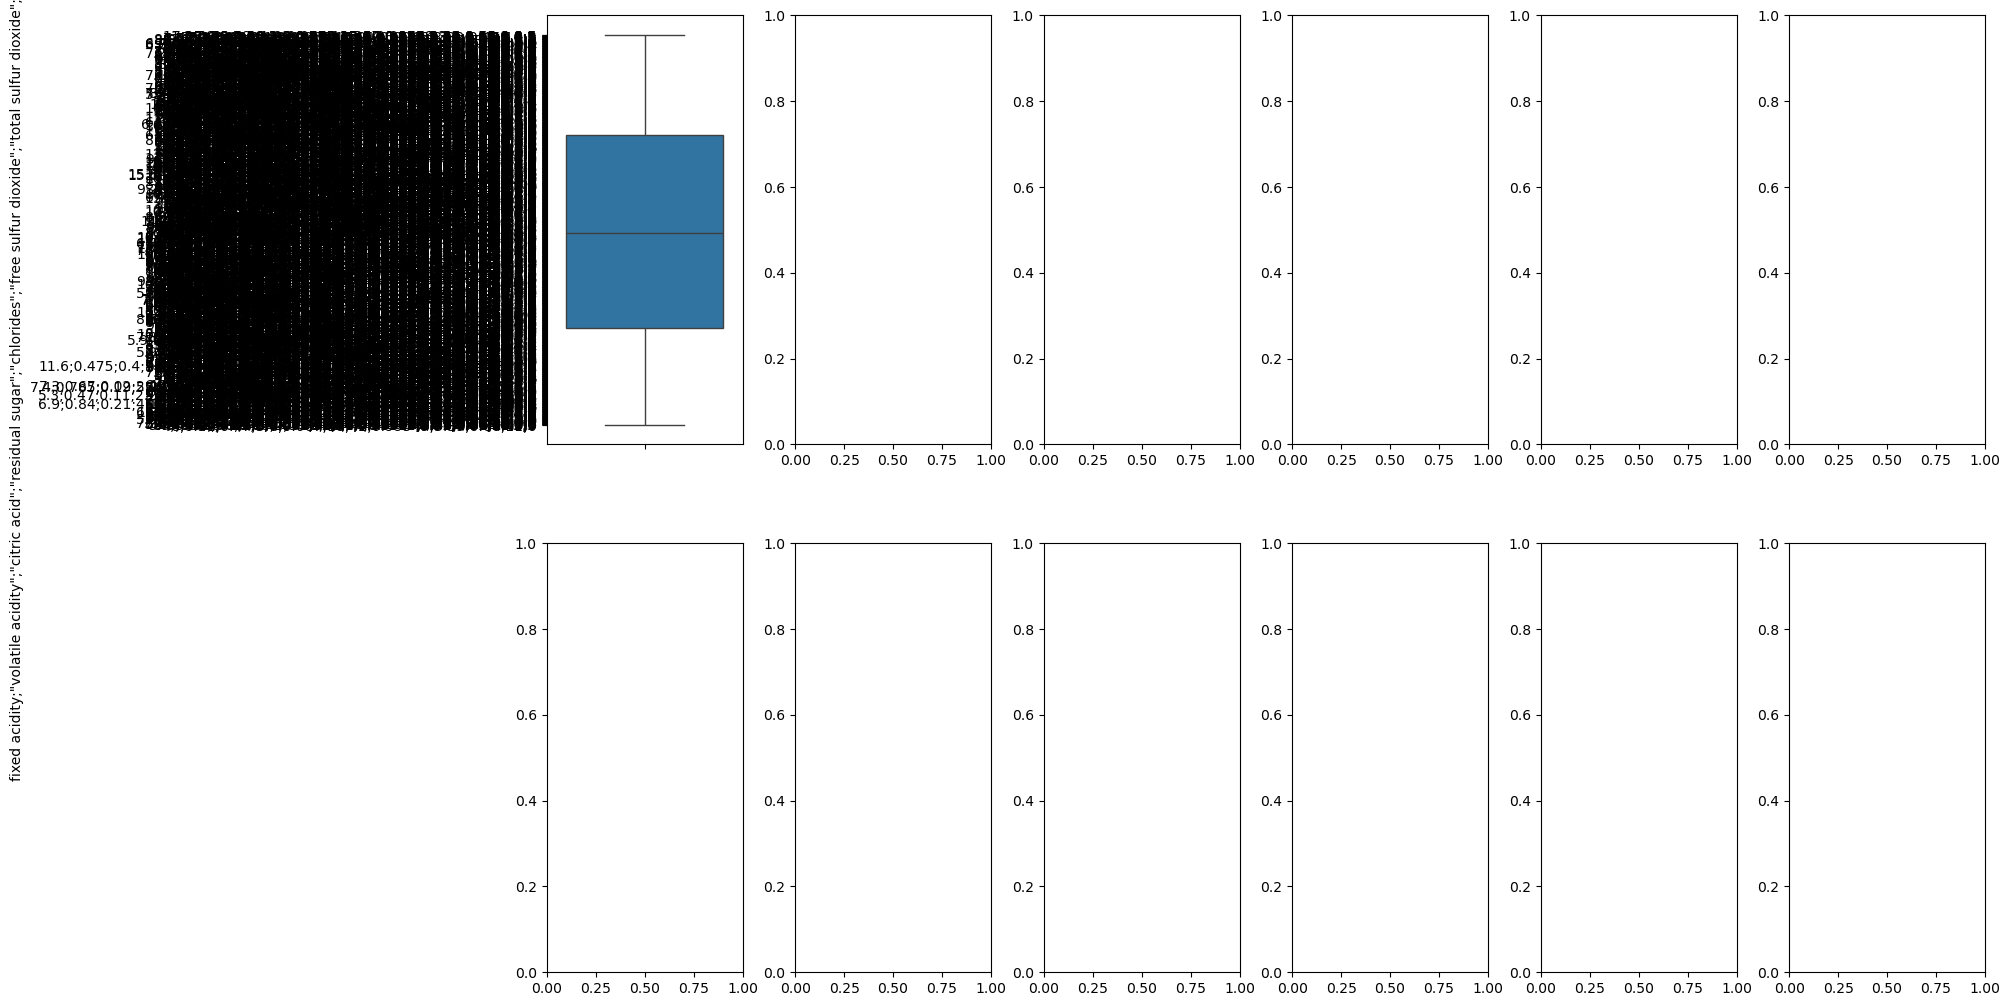

In [8]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

ValueError: could not convert string to float: '7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5'

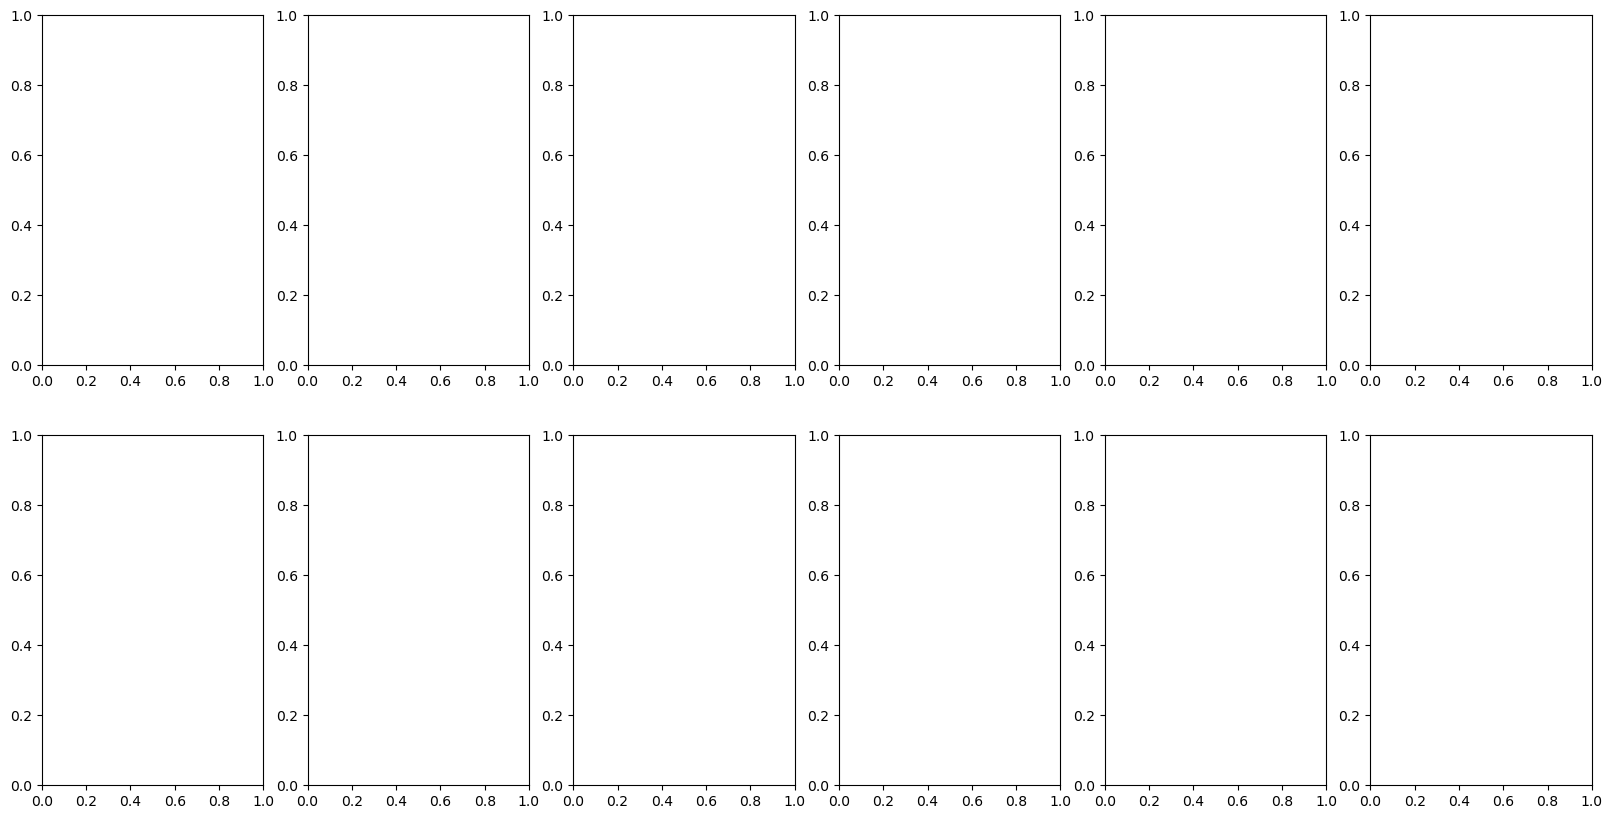

In [9]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

In [ ]:
sns.displot (df['free sulfur dioxide'])

In [ ]:
sns.countplot(df['type'])

In [ ]:
sns.countplot(df['quality'])

In [ ]:
X = df.drop(['type', 'quality'],axis=1)
y = df['quality']

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = LinearRegression()
classify(model, X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
classify(model, X, y)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

In [ ]:
# Remap the class labels in the target variable 'y'
y = y - y.min()

# Now you can proceed with your model training
import xgboost as xgb
model = xgb.XGBClassifier()
classify(model, X, y)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RF, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average CV Accuracy:", np.mean(scores))